<a href="https://colab.research.google.com/github/Itsritu/Capstone-Project--2/blob/main/Copy_of_Zomato_Restaurant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    **- Zomato Restaurant Analysis**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**


The project focused on the end-to-end process of analyzing and modeling a dataset for unsupervised learning tasks, with a primary emphasis on clustering techniques. Through a series of steps ranging from data exploration to model implementation and evaluation, the project aimed to uncover patterns, groupings, and insights within the dataset to support decision-making processes.

The initial phase of the project involved familiarizing ourselves with the dataset through exploratory data analysis (EDA). This step included understanding the dataset's structure, identifying the types of variables, and examining basic statistics to gain insights into its characteristics. Exploratory visualizations, such as histograms, scatter plots, and correlation matrices, were utilized to identify potential relationships between variables and detect any anomalies or outliers.

Following the EDA, data preprocessing steps were undertaken to ensure data quality and prepare the dataset for modeling. This included handling missing values, duplicates, and outliers, as well as feature engineering to create new features or transform existing ones. Techniques such as imputation, scaling, encoding categorical variables, and feature selection were applied to optimize the dataset for machine learning algorithms.

Once the data was preprocessed, the project transitioned into the modeling phase, where various clustering algorithms were implemented to partition the dataset into meaningful groups. Three main clustering techniques were explored: K-means clustering, hierarchical clustering, and DBSCAN clustering. These algorithms were chosen based on their suitability for different types of datasets and clustering requirements.

For each clustering technique, evaluation metrics such as the silhouette score, Davies-Bouldin Index, and Calinski-Harabasz Index were utilized to assess the clustering performance and select the best-performing model. Hyperparameter tuning techniques, including grid search and visualization of evaluation metric scores, were employed to optimize model parameters and improve clustering quality.

In the final phase of the project, the best-performing clustering model was selected based on its performance after hyperparameter tuning and evaluation. The chosen model was then used to generate insights and actionable recommendations for business decision-making. Feature importance analysis was conducted to understand the significance of variables in the clustering process and identify key drivers of cluster formation.

Overall, the project demonstrated a systematic approach to analyzing and modeling a dataset for unsupervised learning tasks. By leveraging clustering techniques and evaluation metrics, valuable insights were extracted from the data, providing stakeholders with a deeper understanding of underlying patterns and relationships. These insights can be utilized to inform strategic decisions, optimize business processes, and drive positive outcomes.

# **GitHub Link -**

# **Problem Statement**


In the rapidly evolving food industry in India, restaurants and food delivery platforms face the constant challenge of adapting to changing consumer preferences, maintaining competitive advantage, and ensuring customer satisfaction. Zomato, as a leading restaurant aggregator and food delivery service, operates in this dynamic environment, striving to meet and exceed customer expectations while supporting its restaurant partners' growth and operational efficiency. The project aims to utilize unsupervised machine learning to analyze Zomato's comprehensive dataset on restaurants across various cities in India. By clustering restaurants and analyzing customer sentiment, the project seeks to unearth actionable insights that can drive strategic decision-making for Zomato and its restaurant partners, ultimately enhancing the customer dining experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import ParameterGrid
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load restaurant data
restaurant_data = pd.read_csv('/content/Zomato Restaurant names and Metadata - Zomato Restaurant names and Metadata.csv')

# Load review data
review_data = pd.read_csv('/content/Zomato Restaurant reviews - Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
restaurant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
restaurant_data.shape

(105, 6)

In [ ]:
review_data.shape

(10000, 7)

### Dataset Information

In [ ]:
# Dataset Info
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
restaurant_data.duplicated().sum()

0

In [ ]:
review_data.duplicated().sum()

36

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(restaurant_data.isnull().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [ ]:
print(review_data.isnull().sum())

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


<Axes: >

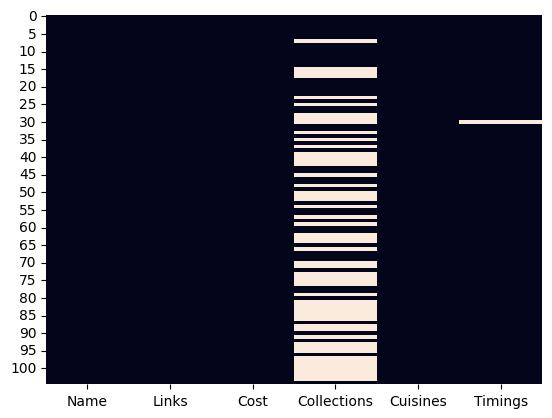

In [ ]:
# Visualizing the missing values
sns.heatmap(restaurant_data.isnull(), cbar=False)

<Axes: >

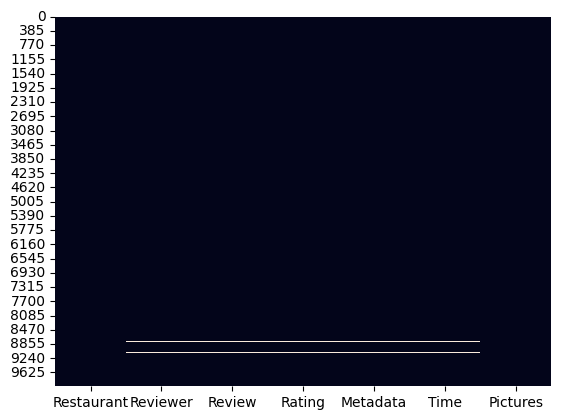

In [ ]:
# Visualizing the missing values
sns.heatmap(review_data.isnull(), cbar=False)

Now to send the clean and organised data for futher processing we need to replace the missing or null values from the dataframe.

### What did you know about your dataset?

The dataset are of Zomato restaurants across the various cities all over the world, from which we need to gain insights and do the analysis to gain more customer dining and increase the spread of the company.The restaurant dataset has the data of the restaurants which has 105 rows and 7 columns.The Review dataset has 1000 rows and 6 columns which contains the reviews of the restaurants visited by the customer.The data do contain null or missing values and will be cleaned after merging of both the datasets into the final frame before visualisation process.   

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
restaurant_data.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
review_data.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
restaurant_data.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
review_data.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description



*   Name :- name of restaurants

*   Links :- url links of restaurants

*   Cost :- per person estimated cost of dinning

*   Collection :- tagging of restaurants w.r.t. zomato categories

*   Timings :- restaurants timings

*   Reviewer :- name of the reviewer

*   Review :- review text

*   Rating :- rating provided
*   MetaData :- reviewer metadata-no of reviews and followers


*   Time :- date and time of review


*   Pictures :- number of pictures posted with review



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in restaurant_data.columns.tolist():
  print("No. of unique values in ",i,"is",restaurant_data[i].nunique(),".")


No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [ ]:
# Check Unique Values for each variable.
for i in review_data.columns.tolist():
  print("No. of unique values in ",i,"is",review_data[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


In [ ]:
# Drop rows with null values
restaurant_data.dropna(inplace=True)

In [ ]:
print(restaurant_data.isnull().sum())

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64


In [ ]:
print(restaurant_data.isna().sum())

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64


In [ ]:
restaurant_data.shape

(51, 6)

In [ ]:
review_data.drop_duplicates()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 00:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [ ]:
review_data.dropna(inplace=True)

In [ ]:
print(review_data.isnull().sum())

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [ ]:
print(review_data.isna().sum())

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [ ]:
print(review_data.duplicated().sum())

0


In [ ]:
review_data.shape

(9955, 7)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#The 'Cost' column is represented as a string with commas.Converting it to a numeric format for easier analysis.
restaurant_data['Cost'] = restaurant_data['Cost'].str.replace(',', '').astype(int)

In [ ]:
# Remove leading and trailing spaces for Name column
restaurant_data['Name'] = restaurant_data['Name'].str.strip()

# Check the updated 'Name' column
restaurant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:

# Converting the midnight and noon values in timings column into am and pm respectively

# Adjusted function to ensure input is treated as a string
def replace_noon_midnight_regex(timings):
    # Ensure timings is treated as a string
    timings = str(timings)
    # Replace "Noon" with "12 PM" (accounting for potential spaces and case-insensitivity)
    timings = re.sub(r'12\s*(noon|Noon)', '12 PM', timings, flags=re.IGNORECASE)
    timings = re.sub(r'\b(noon|Noon)\b', '12 PM', timings, flags=re.IGNORECASE)
    # Replace "Midnight" with "12 AM" (accounting for potential spaces and case-insensitivity)
    timings = re.sub(r'12\s*(midnight|Midnight)', '12 AM', timings, flags=re.IGNORECASE)
    timings = re.sub(r'\b(midnight|Midnight)\b', '12 AM', timings, flags=re.IGNORECASE)
    return timings

# Apply the function to each value in the 'Timings' column
restaurant_data['Timings'] = restaurant_data['Timings'].apply(replace_noon_midnight_regex)

# Display the modified DataFrame to verify changes
restaurant_data.head()



,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 PM to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12 PM to 11pm (Mon, Tue, Wed, Thu, Sun), 12 PM..."


In [ ]:

# Replacing the "to"word into hyphen present in the values of timings collumn.
def replace_to_with_hyphen(timing_str):
    return timing_str.replace(' to ', ' - ')

# Apply the function to each value in the 'Timings' column
restaurant_data['Timings'] = restaurant_data['Timings'].apply(replace_to_with_hyphen)

# Display the updated DataFrame
restaurant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30pm, 6:30pm - 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM - 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM - 4:30 PM, 6:30 PM - 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 PM - 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12 PM - 11pm (Mon, Tue, Wed, Thu, Sun), 12 PM ..."


In [ ]:
# Function to append Mon-Sun if days are not mentioned for each timing range
def append_week_days(timing_str):
    timings = timing_str.split(', ')
    updated_timings = []
    for timing in timings:
        # Check if the days are mentioned
        if re.search(r'\b(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\b', timing) is None:
            timing += ' (Mon-Sun)'
        updated_timings.append(timing)
    return ', '.join(updated_timings)

# Apply the function to each value in the 'Timings' column
restaurant_data['Timings'] = restaurant_data['Timings'].apply(append_week_days)

# Display the updated DataFrame
restaurant_data.head(10)


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30pm (Mon-Sun), 6:30pm - 11:30pm (Mo..."
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM - 11 PM (Mon-Sun)
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM - 4:30 PM (Mon-Sun), 6:30 PM - 11 PM ..."
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 PM - 2 AM (Mon-Sun)
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12 PM - 11pm (Mon, Tue, Wed, Thu, Sun), 12 PM ..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,1500,"Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12 PM - 3:30PM (Mon-Sun), 4PM - 6:30PM (Mon-Su..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM - 10 PM (Mon-Sun)
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,1000,"Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 PM - 12 AM (Mon-Sun)
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM - 1 AM (Mon-Thu), 10 AM - 1:30 AM (Fri-Sun)"
10,Sardarji's Chaats & More,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, Veggie Friendly, Pocket Friendly","Street Food, North Indian, Fast Food","12 PM - 3:30 PM (Mon-Sun), 7 PM - 10:30 PM (Mo..."


In [ ]:
# Function to normalize the timings column
def normalize_timings(timing_str):
    # Convert all instances of 'am' and 'pm' to uppercase
    timing_str = timing_str.replace('am', 'AM').replace('pm', 'PM')

    # Add space after time zone if it's missing
    timing_str = timing_str.replace('AM-', 'AM -').replace('PM-', 'PM -')

    return timing_str

# Apply the function to update each value in the 'Timings' column
restaurant_data['Timings'] = restaurant_data['Timings'].apply(normalize_timings)

# Display the updated DataFrame
restaurant_data.head(10)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (Mo..."
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM - 11 PM (Mon-Sun)
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM - 4:30 PM (Mon-Sun), 6:30 PM - 11 PM ..."
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 PM - 2 AM (Mon-Sun)
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12 PM - 11PM (Mon, Tue, Wed, Thu, Sun), 12 PM ..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,1500,"Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12 PM - 3:30PM (Mon-Sun), 4PM - 6:30PM (Mon-Su..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM - 10 PM (Mon-Sun)
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,1000,"Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 PM - 12 AM (Mon-Sun)
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM - 1 AM (Mon-Thu), 10 AM - 1:30 AM (Fri-Sun)"
10,Sardarji's Chaats & More,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, Veggie Friendly, Pocket Friendly","Street Food, North Indian, Fast Food","12 PM - 3:30 PM (Mon-Sun), 7 PM - 10:30 PM (Mo..."


In [ ]:

# Function to remove "Closed" entries and days of week specifically mentioning with the word "Closed".
def remove_closed_entries(timing_str):
    # Split the string by ',' to separate different timing entries
    parts = timing_str.split(',')
    # Filter out parts that contain the word "Closed"
    filtered_parts = [part for part in parts if "Closed" not in part]
    # Join the remaining parts back together
    new_timing_str = ', '.join(filtered_parts).strip()
    return new_timing_str

# Apply the function to each value in the 'Timings' column
restaurant_data['Timings'] = restaurant_data['Timings'].apply(remove_closed_entries)

# Display the updated DataFrame
restaurant_data.head(10)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M..."
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM - 11 PM (Mon-Sun)
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM - 4:30 PM (Mon-Sun), 6:30 PM - 11 PM..."
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 PM - 2 AM (Mon-Sun)
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12 PM - 11PM (Mon, Tue, Wed, Thu, Sun), 1..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,1500,"Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12 PM - 3:30PM (Mon-Sun), 4PM - 6:30PM (Mon-S..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM - 10 PM (Mon-Sun)
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,1000,"Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 PM - 12 AM (Mon-Sun)
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM - 1 AM (Mon-Thu), 10 AM - 1:30 AM (Fri-..."
10,Sardarji's Chaats & More,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, Veggie Friendly, Pocket Friendly","Street Food, North Indian, Fast Food","12 PM - 3:30 PM (Mon-Sun), 7 PM - 10:30 PM (M..."


In [ ]:

# Function to clean reviewer names
def clean_reviewer(reviewer):
    if isinstance(reviewer, str):
        # Remove special characters using regular expression
        cleaned_reviewer = re.sub(r'[^a-zA-Z0-9\s]', '', reviewer)
        # Remove numeric digits
        cleaned_reviewer = re.sub(r'\d+', '', cleaned_reviewer)
        # Convert to lowercase
        cleaned_reviewer = cleaned_reviewer.lower()
        return cleaned_reviewer
    else:
        return reviewer

# Apply the clean_reviewer function to the 'Reviewer' column
review_data['Reviewer'] = review_data['Reviewer'].apply(clean_reviewer)

# Display the updated DataFrame
print(review_data['Reviewer'])

0          rusha chakraborty
1       anusha tirumalaneedi
2            ashok shekhawat
3             swapnil sarkar
4                     dileep
                ...         
9995        abhishek mahajan
9996          sharad agrawal
9997               ramandeep
9998         nayana shanbhag
9999        bhargava krishna
Name: Reviewer, Length: 9955, dtype: object


In [ ]:

#Fucnction to clear the review texts present in the review column.
def clean_text(text):
    if pd.isna(text):
        return text  # Return NaN as is or you can choose to return a default string like ""
    # Convert text to lowercase
    text = text.lower()
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # Remove emojis
    # Remove special characters except '/' and '.'
    text = re.sub(r'[^\w\s\/.]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the clean_text function to the 'Review' column
review_data['Review'] = review_data['Review'].apply(clean_text)

# Display the updated DataFrame
review_data['Review']


0       the ambience was good food was quite good . ha...
1       ambience is too good for a pleasant evening. s...
2       a must try.. great food great ambience. thnx f...
3       soumen das and arun was a great guy. only beca...
4       food is good.we ordered kodi drumsticks and ba...
                              ...                        
9995    madhumathi mahajan well to start with nice cou...
9996    this place has never disappointed us.. the foo...
9997    bad rating is mainly because of chicken bone f...
9998    i personally love and prefer chinese food. had...
9999    checked in here to try some delicious chinese ...
Name: Review, Length: 9955, dtype: object

In [ ]:

# Function to extract the number of followers and update MetaData
def extract_and_update_meta(data):
    if pd.isna(data):
        return pd.Series([None, None])
    # Extract followers
    followers_match = re.search(r'(\d+)\s*Followers?', data)
    followers = int(followers_match.group(1)) if followers_match else None
    # Update MetaData to keep only Reviews part
    updated_meta = re.sub(r',?\s*\d+\s*Followers?', '', data)
    return pd.Series([updated_meta, followers])

# Apply the function to the DataFrame, update columns accordingly
review_data[['Metadata', 'Followers']] = review_data['Metadata'].apply(extract_and_update_meta)

# Display the updated DataFrame
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Followers
0,Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1 Review,5/25/2019 15:54,0,2.0
1,Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3 Reviews,5/25/2019 14:20,0,2.0
2,Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2 Reviews,5/24/2019 22:54,0,3.0
3,Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1 Review,5/24/2019 22:11,0,1.0
4,Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3 Reviews,5/24/2019 21:37,0,2.0


In [ ]:

# Rename the column 'Metadata' to 'Total_reviews'
review_data.rename(columns={'Metadata': 'Total_reviews'}, inplace=True)

# Display the DataFrame after renaming
review_data.head()

,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers
0,Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1 Review,5/25/2019 15:54,0,2.0
1,Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3 Reviews,5/25/2019 14:20,0,2.0
2,Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2 Reviews,5/24/2019 22:54,0,3.0
3,Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1 Review,5/24/2019 22:11,0,1.0
4,Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3 Reviews,5/24/2019 21:37,0,2.0


In [ ]:

# Function to extract the numeric part from each value in the 'Total_reviews' column
def extract_numeric(value):
    if pd.isna(value):
        return None
    numeric_part = re.search(r'\d+', value)
    return int(numeric_part.group()) if numeric_part else None

# Apply the function to the 'Total_reviews' column
review_data['Total_reviews'] = review_data['Total_reviews'].apply(extract_numeric)

# Display the DataFrame after extraction
review_data.head()


,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers
0,Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1,5/25/2019 15:54,0,2.0
1,Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3,5/25/2019 14:20,0,2.0
2,Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2,5/24/2019 22:54,0,3.0
3,Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1,5/24/2019 22:11,0,1.0
4,Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3,5/24/2019 21:37,0,2.0


In [ ]:
# Function to extract date from the time column
def extract_date(time_str):
    if pd.isna(time_str):
        return None
    # Split the time string by space to separate date and time
    date_str, _ = time_str.split()
    return date_str

# Apply the function to extract date from the 'Time' column
review_data['Date'] = review_data['Time'].apply(extract_date)

# Remove the date from the 'Time' column
review_data['Time'] = review_data['Time'].apply(lambda x: x.split()[1] if pd.notnull(x) else None)

# Display the updated DataFrame
review_data

,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers,Date
0,Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1,15:54,0,2.0,5/25/2019
1,Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3,14:20,0,2.0,5/25/2019
2,Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2,22:54,0,3.0,5/24/2019
3,Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1,22:11,0,1.0,5/24/2019
4,Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3,21:37,0,2.0,5/24/2019
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,abhishek mahajan,madhumathi mahajan well to start with nice cou...,3,53,00:08,0,54.0,6/5/2016
9996,Chinese Pavilion,sharad agrawal,this place has never disappointed us.. the foo...,4.5,2,22:01,0,53.0,6/4/2016
9997,Chinese Pavilion,ramandeep,bad rating is mainly because of chicken bone f...,1.5,65,10:37,3,423.0,6/3/2016
9998,Chinese Pavilion,nayana shanbhag,i personally love and prefer chinese food. had...,4,13,17:22,0,144.0,5/31/2016


In [ ]:

# Drop rows with missing values in the 'Followers' column
review_data.dropna(subset=['Followers'], inplace=True)

# Convert values in 'Followers' column to integers without decimal part
review_data['Followers'] = review_data['Followers'].astype(str).str.split('.').str[0].astype(int)

# Display the updated DataFrame
review_data.head()

,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers,Date
0,Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1,15:54,0,2,5/25/2019
1,Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3,14:20,0,2,5/25/2019
2,Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2,22:54,0,3,5/24/2019
3,Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1,22:11,0,1,5/24/2019
4,Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3,21:37,0,2,5/24/2019


In [ ]:
review_data.head(10)

,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers,Date
0,Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1,15:54,0,2,5/25/2019
1,Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3,14:20,0,2,5/25/2019
2,Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2,22:54,0,3,5/24/2019
3,Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1,22:11,0,1,5/24/2019
4,Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3,21:37,0,2,5/24/2019
8,Beyond Flavours,akash thorat,excellent food specially if you like spicy foo...,5,1,23:12,0,1,5/22/2019
9,Beyond Flavours,smarak patnaik,came for the birthday treat of a close friend....,5,1,22:37,0,1,5/22/2019
10,Beyond Flavours,saubhagya bhuyan,the service was great and the food was awesome...,5,1,22:22,0,1,5/22/2019
11,Beyond Flavours,srivaths,very good ambience amazing food good service a...,5,3,21:43,0,1,5/22/2019
12,Beyond Flavours,kunj mishra,food was very good. soup was as expected. in s...,5,1,21:29,0,1,5/22/2019


### What all manipulations have you done and insights you found?

1)The cost column values are converted to numeric format which were in the string with commas.

2)Remove the leading and trailing spaces from the name column.

3)Maintaining the consistent case i.e. all lowercase letters for the names of the restaurants.

4)Converting the midnight and noon words to 'AM'and 'PM' respectively for better clearance of time.

5)Replacing the "to" word into hyphen present in the values of timings column.

6)Then we have added the Mon-Sun if the days are not mentioned for each timing range.

7)A function is defined to convert all instances of "AM" and "PM" to uppper case and add a space after the timezones if its missing.

8)The last step is to remove the redundant information such as closed and the days of week mentioned with it, so that we can only focus on the opening hours.

9)Cleaning the reviewer data values by removing the  special characters, numeric digits in the names and then convert them to lowercase which is good for analysis.

10)Same is for the review column values, emojis & special characters and also the extra spaces are removed from the review texts.

11)Seprating the number of reviews and followers from the Metadata column for better visualisation and anlysis.

12)The last step is that we have seprated the time and date from the time column, as they both were attached in the time values originally.

In [ ]:
# Normalize the restaurant names in both dataframes
restaurant_data['Name_normalized'] = restaurant_data['Name'].str.lower().str.strip().str.replace('[^\w\s]', '', regex=True)
review_data['Restaurant_Name_normalized'] = review_data['Restaurant'].str.lower().str.strip().str.replace('[^\w\s]', '', regex=True)

# Merge the dataframes on the normalized name columns
df = pd.merge(restaurant_data, review_data, left_on='Name_normalized', right_on='Restaurant_Name_normalized', how='inner')

# Optionally, drop the normalized columns if they're no longer needed
df.drop(columns=['Name_normalized', 'Restaurant_Name_normalized'], inplace=True)

# Display the first few rows of the merged DataFrame to verify the merge
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers,Date
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1,15:54,0,2,5/25/2019
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3,14:20,0,2,5/25/2019
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2,22:54,0,3,5/24/2019
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1,22:11,0,1,5/24/2019
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3,21:37,0,2,5/24/2019


In [ ]:
df.shape

(4319, 15)

In [ ]:
df.isnull().sum()

Name             0
Links            0
Cost             0
Collections      0
Cuisines         0
Timings          0
Restaurant       0
Reviewer         0
Review           0
Rating           0
Total_reviews    0
Time             0
Pictures         0
Followers        0
Date             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           4319 non-null   object
 1   Links          4319 non-null   object
 2   Cost           4319 non-null   int64 
 3   Collections    4319 non-null   object
 4   Cuisines       4319 non-null   object
 5   Timings        4319 non-null   object
 6   Restaurant     4319 non-null   object
 7   Reviewer       4319 non-null   object
 8   Review         4319 non-null   object
 9   Rating         4319 non-null   object
 10  Total_reviews  4319 non-null   int64 
 11  Time           4319 non-null   object
 12  Pictures       4319 non-null   int64 
 13  Followers      4319 non-null   int64 
 14  Date           4319 non-null   object
dtypes: int64(4), object(11)
memory usage: 506.3+ KB


In [ ]:
df.describe()

,Cost,Total_reviews,Pictures,Followers
count,4319.000000,4319.000000,4319.000000,4319.000000
mean,1117.828201,28.052327,1.076175,203.919426
std,526.754601,55.264982,3.323389,737.727697
min,350.000000,0.000000,0.000000,1.000000
25%,700.000000,2.000000,0.000000,3.000000
50%,1100.000000,7.000000,0.000000,15.000000
75%,1500.000000,29.000000,0.000000,96.000000
max,2800.000000,1031.000000,64.000000,13410.000000


In [ ]:
df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Restaurant', 'Reviewer', 'Review', 'Rating', 'Total_reviews', 'Time',
       'Pictures', 'Followers', 'Date'],
      dtype='object')

Finally the resultant dataframe i.e. "df" is free of all the missing and duplicate values and is ready for the further analysis.


In [ ]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers,Date
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,rusha chakraborty,the ambience was good food was quite good . ha...,5,1,15:54,0,2,5/25/2019
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,3,14:20,0,2,5/25/2019
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,2,22:54,0,3,5/24/2019
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,1,22:11,0,1,5/24/2019
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,3,21:37,0,2,5/24/2019


**The Resultant data frame variable description.**
*   Name :- name of restaurants

*   Links :- url links of restaurants

*   Cost :- per person estimated cost of dinning

*   Collection :- tagging of restaurants w.r.t. zomato categories

*   Timings :- restaurants timings

*   Reviewer :- name of the reviewer

*   Review :- review text

*   Rating :- rating provided
*   MetaData :- review count of the reviewer


*   Time :- posted time of review


*   Pictures :- number of pictures posted with review   

*   Followers:- follower count of the reviewer
*   Date:- review posted date





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
#Making the copy of df and assigning it to dataset for safety of the original dataset
dataset = df.copy()

#### Chart - 1

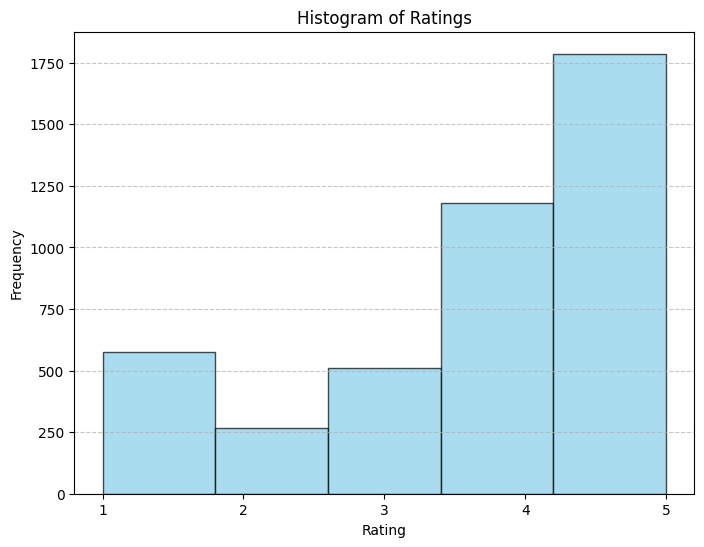

In [ ]:
# Chart - 1 visualization code

#Histogram of Ratings

ratings = dataset['Rating'].astype(float)

# Plotting the histogram to show the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.xticks(range(1, 6))  # Set x-axis ticks from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a suitable choice to visualize the distribution of ratings, providing insights into the overall sentiment of the reviews.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows the frequency distribution of ratings, indicating the most common ratings given by customers.
The histogram shows that there is positive response from the customers for the restuarants and very less response or low rating from the customers visiting restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the distribution of ratings can help identify areas of improvement and prioritize efforts to enhance customer experience.
There low response is very less from the customers denotes that maaximum restaurants are perform good and while very few needs the attention to achieve the good growth.

#### Chart - 2

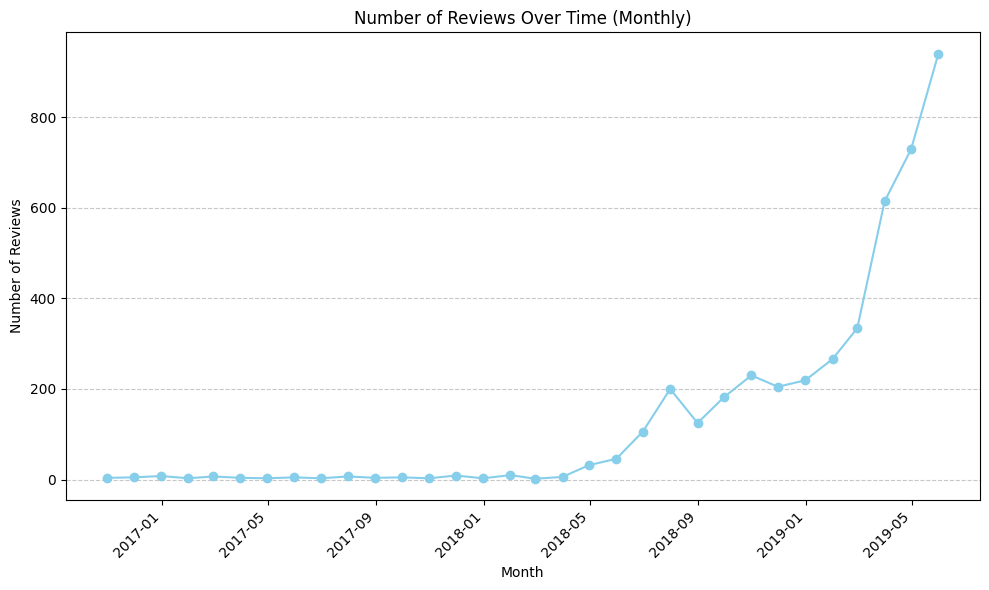

In [ ]:
# Chart - 13 visualization code

#Visualising the number of Reviews Over Time (Monthly)

# Convert 'Date' column to datetime format (if needed)
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Aggregate the data by month
df_monthly = dataset.groupby(pd.Grouper(key='Date', freq='M')).size().reset_index(name='Review Count')

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Review Count'], marker='o', color='skyblue', linestyle='-')
plt.title('Number of Reviews Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart to visualize the number of reviews over time because it effectively shows trends and patterns in review activity. A line chart is suitable for demonstrating how the number of reviews changes over different time periods, allowing us to identify any increasing or decreasing trends.

##### 2. What is/are the insight(s) found from the chart?

We can see almost the same number reviews from first year and mid second year and then we can see the growth of the number of reviews from the mid of second year which shows the good customer engagement and shows the good response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can have a positive business impact. By understanding the trends in review activity, businesses can better gauge customer satisfaction, identify peak periods of engagement, and adjust their strategies accordingly. The months which have less number of reviews count we need to offer promotions and also need to give good services during those periods.

#### Chart - 3

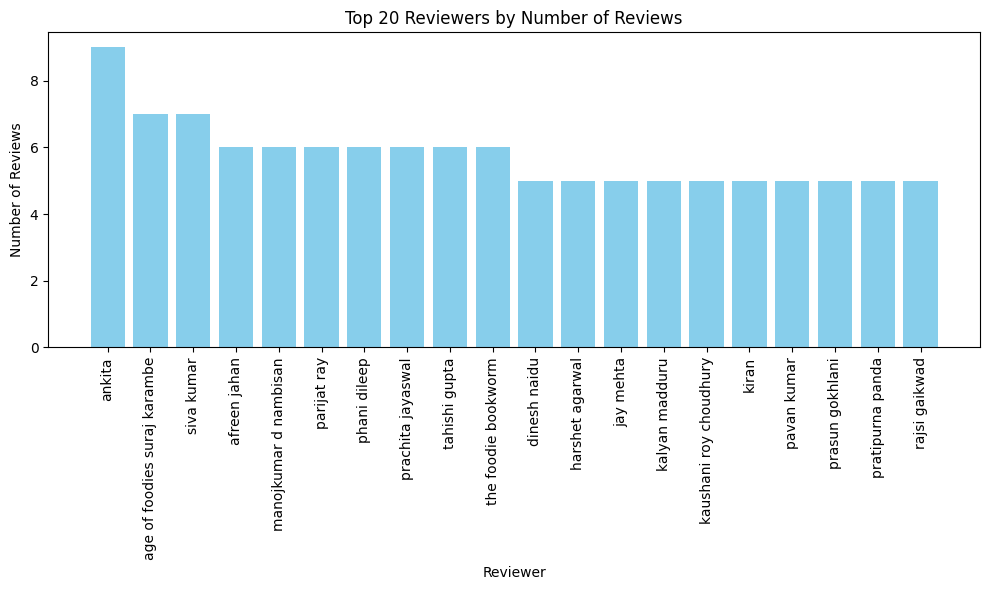

In [ ]:
# Chart - 3 visualization code

#Distribution of first top 20 viewers by number of reviews

# Step 1: Aggregate the number of reviews for each reviewer
reviewer_reviews = dataset.groupby('Reviewer').size().reset_index(name='Number of Reviews')

# Step 2: Select the top 20 reviewers based on the number of reviews they have submitted
top_20_reviewers = reviewer_reviews.nlargest(20, 'Number of Reviews')

# Step 3: Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_20_reviewers['Reviewer'], top_20_reviewers['Number of Reviews'], color='skyblue')
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.title('Top 20 Reviewers by Number of Reviews')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked a bar chart to visualize the number of reviews by the top 20 reviewers because it effectively presents the distribution of reviews among the most active reviewers. A bar chart allows for easy comparison of the number of reviews submitted by each reviewer, making it suitable for identifying the top contributors.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the top 20 reviewers who have contributed the most reviews. It provides insights into which reviewers are the most active and influential in providing feedback on restaurants. This information can help identify key opinion leaders and influencers in the context of restaurant reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals the top 20 reviewers who have contributed the most reviews. It provides insights into which reviewers are the most active and influential in providing feedback on restaurants. This information can help identify key opinion leaders and influencers in the context of restaurant reviews.There are no insights from this chart that directly lead to negative growth. However, if certain reviewers consistently provide negative feedback or highlight significant issues with restaurants, it could potentially impact the reputation and growth of those establishments.

#### Chart - 4

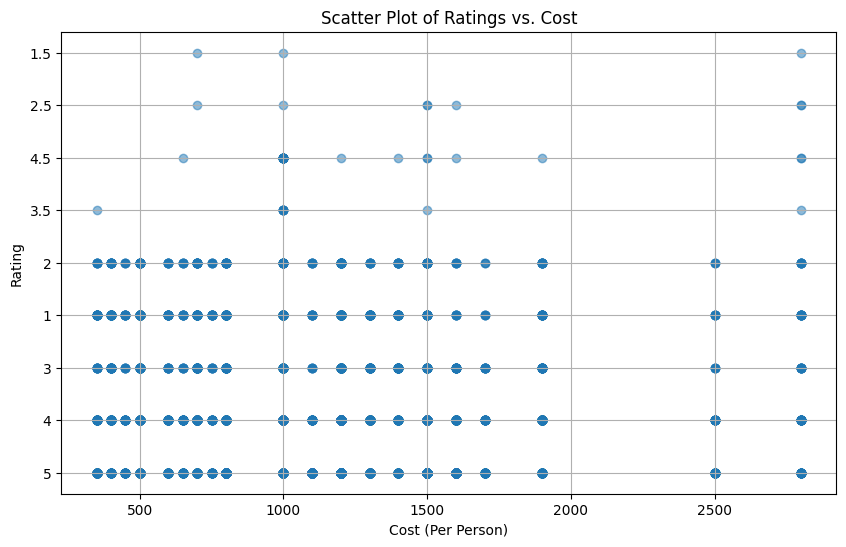

In [ ]:
# Chart - 4 visualization code

#Scatter Plot of Ratings vs. Cost

plt.figure(figsize=(10, 6))
plt.scatter(dataset['Cost'], dataset['Rating'], alpha=0.5)
plt.title('Scatter Plot of Ratings vs. Cost')
plt.xlabel('Cost (Per Person)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between ratings and the cost per person because it allows for the examination of potential correlations or patterns between these two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

The most amount of people seem to take average cost and less amount of people are there for the high cost, which indicates that mostly public is the common public and less are there from the higher ranks.The low ratings are also given with equal number of good ratings which shows there need an attention to improve the poor areas of the restaurants.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the scatter plot generated is helping us to line up the insights which will be useful for the company to improve the growth.There are the areas which need to check and see where is the lackage, as the amount of people with good ratings are same as the people with the low ratings.

#### Chart - 5

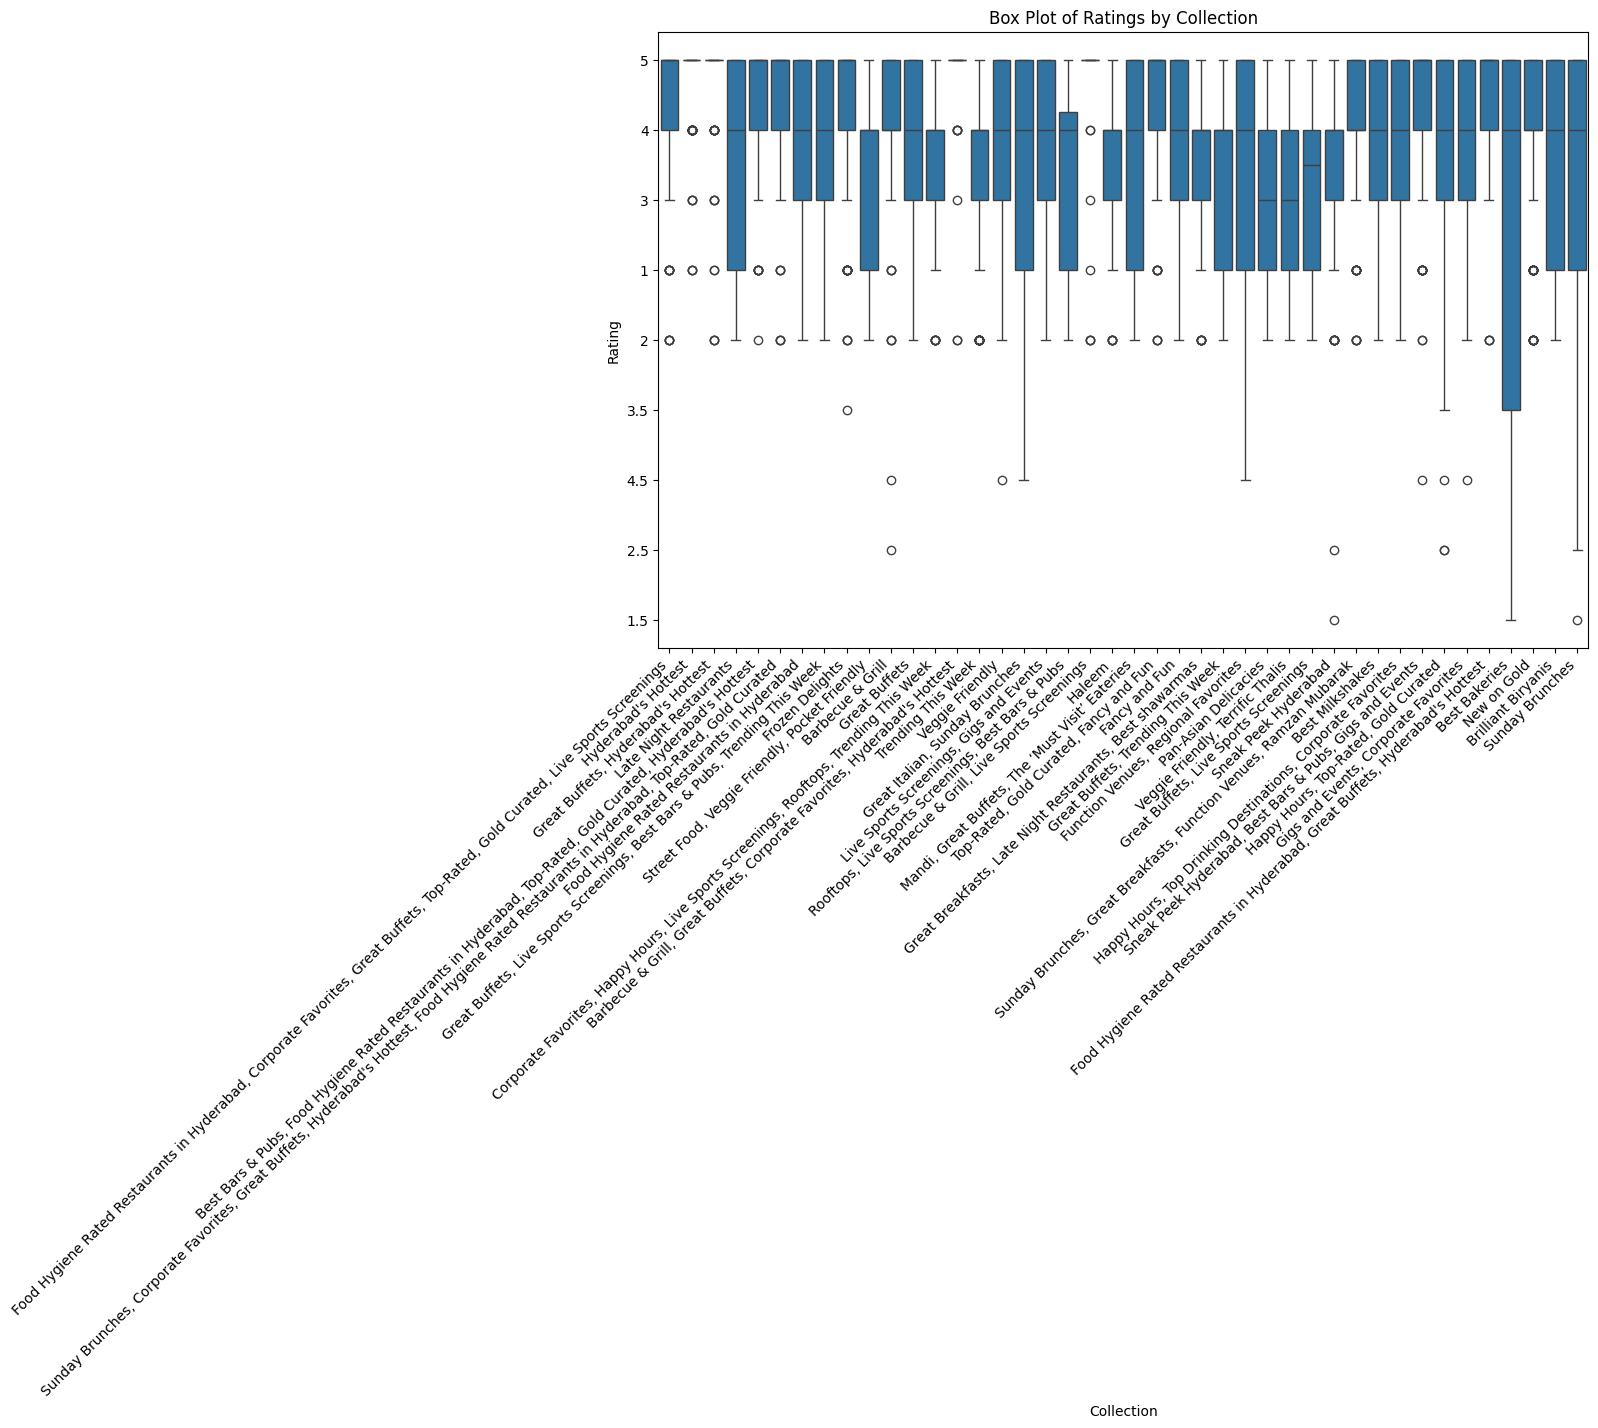

In [ ]:
# Chart - 5 visualization code

#Box Plot of "Ratings by Collection"

plt.figure(figsize=(12, 8))
sns.boxplot(x='Collections', y='Rating', data=dataset)
plt.title('Box Plot of Ratings by Collection')
plt.xlabel('Collection')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot to visualize the distribution of ratings across different restaurant collections because it provides insights into the central tendency, spread, and presence of outliers within each collection category.

##### 2. What is/are the insight(s) found from the chart?

The box plot displays the median, quartiles, and potential outliers of ratings for each collection category.We can see the outliers for few of the collections in the box plot, which shows that mostly ratings for the specific collections is in the IQR range very few outside of it.Most of the collections have the upper quartile starting from 5 and going down, but for some it is from 4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding how ratings vary across different restaurant collections can help businesses identify strengths and weaknesses within each category. Positive insights can inform marketing strategies to promote popular collection categories and optimize customer satisfaction. Conversely, negative insights can prompt targeted improvements to address issues affecting customer perception and experience. There are very few outliers in the chart which shows that there is positive impact and very few areas are there which need the check to improve the revenue and hence the rating.

#### Chart - 6

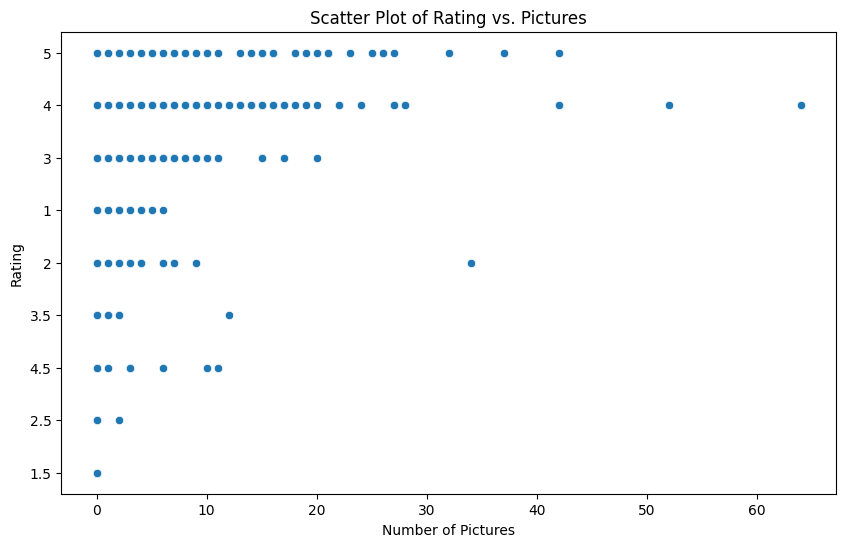

In [ ]:
# Chart - 6 visualization code

#Scatter Plot of Rating vs. Pictures

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pictures', y='Rating', data=dataset)
plt.title('Scatter Plot of Rating vs. Pictures')
plt.xlabel('Number of Pictures')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to explore the relationship between the number of pictures posted with a review and the ratings provided by reviewers. This chart allows us to visualize any potential correlation or patterns between these two variables.

##### 2. What is/are the insight(s) found from the chart?

We can see that most number of pictures of the restaurants are posted by the customers which has the good rating and vice versa.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights clearly depict the strong relation between the number of pictures and ratongs, and shows the positive the impact.We can see the number of pictures are more for good rating and there are very less number of pictures or no picutres for the low ratings which shows the excitement of the users to anticipate for good hospitality of the restaurants.

#### Chart - 7

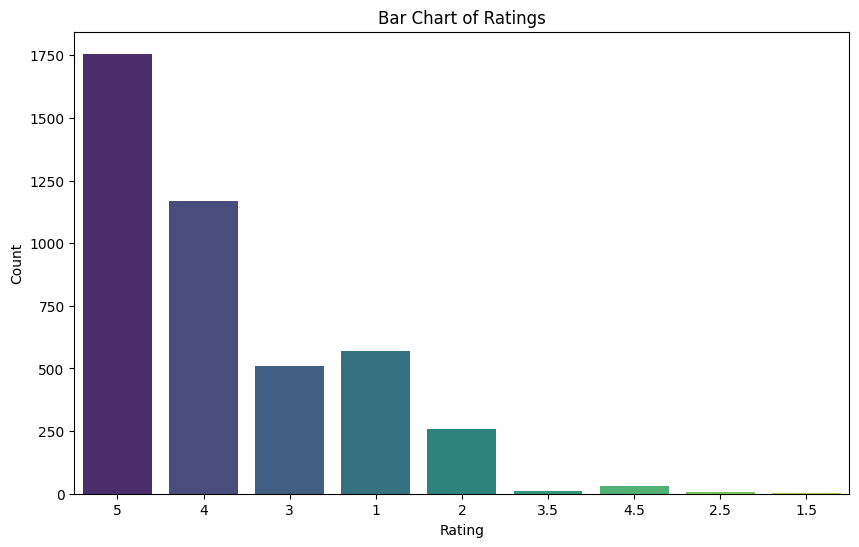

In [ ]:
# Chart - 7 visualization code

#Bar chart for the count of ratings

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Bar Chart of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the distribution of ratings. A bar chart is effective for showing the frequency or count of each rating category, providing a clear and straightforward representation of the data.

##### 2. What is/are the insight(s) found from the chart?

Most number of ratings are for 5th and 4th which shows the positive impact and less for the other numbers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the distribution of ratings is crucial for businesses to gauge customer satisfaction and identify areas for improvement. Positive insights, such as a high frequency of positive ratings, can reinforce the reputation of restaurants and attract more customers. Conversely, insights into lower ratings may prompt businesses to take corrective actions to enhance service quality and address customer concerns. No, there is no such negative impact as the chart shows that there is very less count of the ratings for the low ratings that are 1th, 2nd and 3rd.

#### Chart - 8

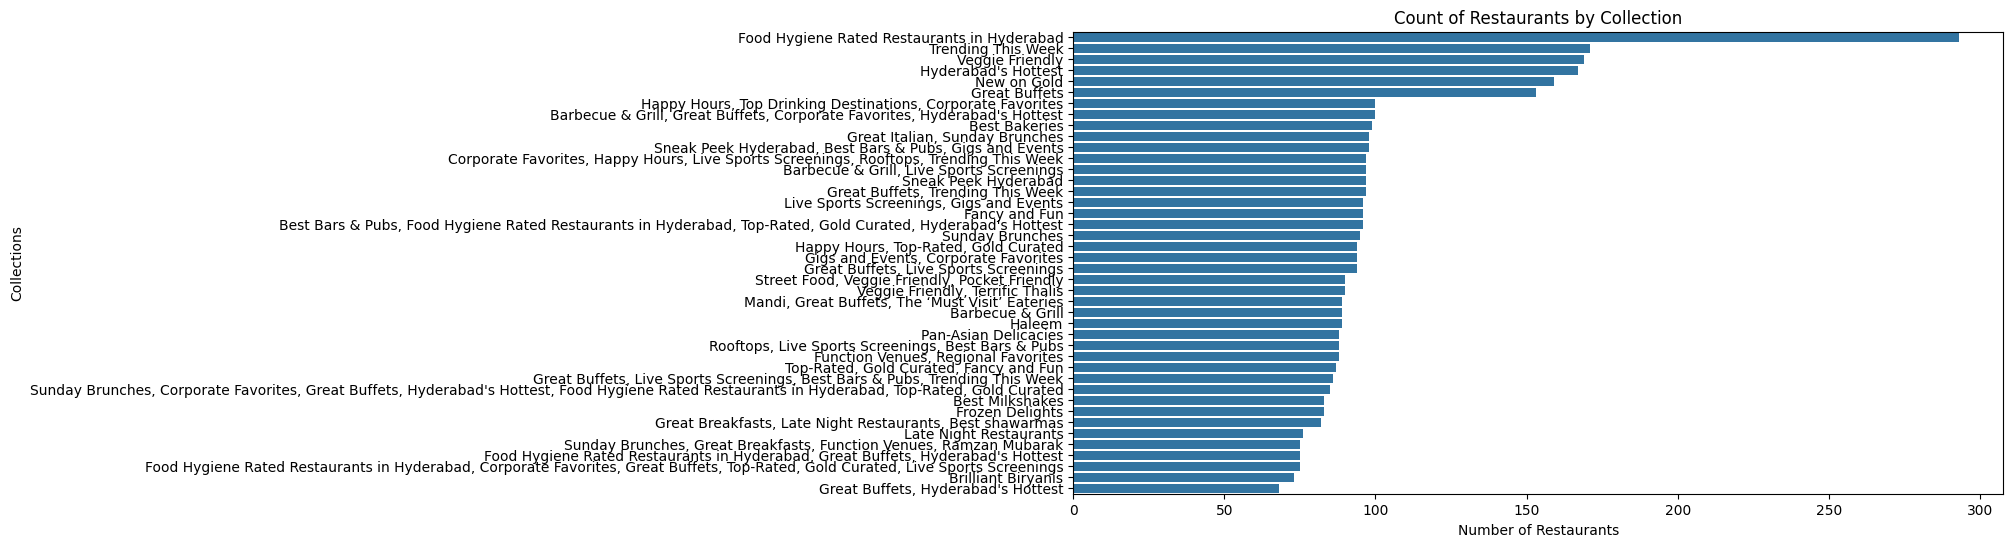

In [ ]:
# Chart - 8 visualization code

#Count Plot of Collections

plt.figure(figsize=(12, 6))
sns.countplot(y='Collections', data=dataset, order=dataset['Collections'].value_counts().index)
plt.title('Count of Restaurants by Collection')
plt.xlabel('Number of Restaurants')
plt.ylabel('Collections')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a count plot to visualize the distribution of restaurants across different collections. This chart helps identify the popularity of various restaurant categories and provides insights into the diversity of cuisines available.

##### 2. What is/are the insight(s) found from the chart?

The most of the collections have same number of the count and very few has more amount of count.Insights from the count plot may include identifying which restaurant collections are the most prevalent or dominant in the dataset. We can observe the relative frequencies of different types of restaurants and their distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no disproportionate distribution of restauranrs across the collections and shows that there is no potential gaps in the market or undeserved segments

#### Chart - 9

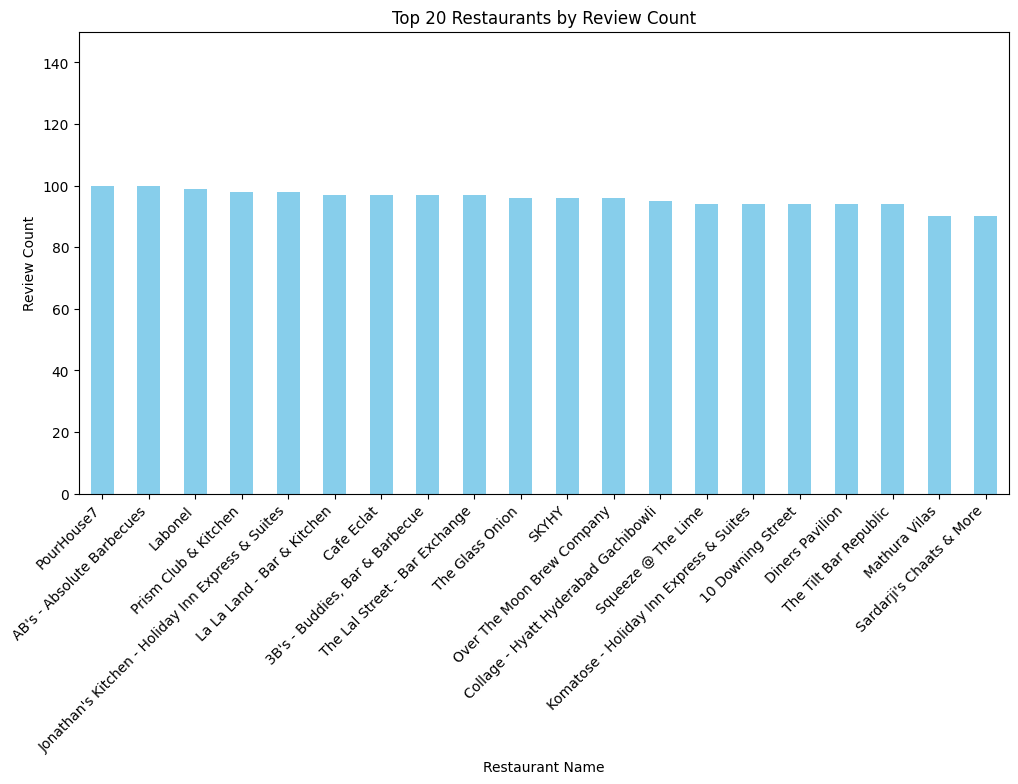

In [ ]:
# Chart - 9 visualization code

#Top 20 Restaurants by Review Count

plt.figure(figsize=(12, 6))
# Count the occurrences of each restaurant name
restaurant_review_counts = dataset['Name'].value_counts().head(20)
# Plot the bar chart
restaurant_review_counts.plot(kind='bar', color='skyblue')

plt.title('Top 20 Restaurants by Review Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')

# Set custom y-axis limits
plt.ylim(0, restaurant_review_counts.max() + 50)

plt.show()

##### 1. Why did you pick the specific chart?

Categorical Data: The data being displayed (restaurant names) is categorical, meaning it represents distinct groups/categories (restaurants). Bar charts are well-suited for comparing values across categories. Emphasis on Magnitude: Bar charts visually emphasize the differences in review counts between restaurants. The length of each bar directly corresponds to the number of reviews, making it easy to identify the most reviewed restaurants at a glance. Clarity for Ranking: Since the chart focuses on the top 20, a bar chart provides a clear ranking order. The tallest bars represent the most reviewed restaurants, with bars decreasing in height as we move down the ranking.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several insights about the review distribution among restaurants:

Top Performers: The chart identifies the restaurants that have garnered the most reviews. These restaurants might be well-established with a loyal customer base or have experienced recent marketing success. Distribution of Reviews: The chart allows us to analyze the spread of reviews across different restaurants. Are there a few dominant players with a significant number of reviews, or is the distribution more even? Potential for Growth: Restaurants with fewer reviews might be new or might have untapped potential for attracting and engaging customers online.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart can be used to create positive business impacts:

Marketing Strategies: Restaurants with high review counts can leverage their popularity in marketing campaigns, attracting new customers who trust the positive feedback from others. Identifying Customer Preferences: Analyzing the reviews associated with highly-reviewed restaurants can provide valuable insights into customer preferences (e.g., popular dishes, service aspects appreciated by customers). This information can be used to improve offerings and target marketing efforts more effectively. Prioritization for New Restaurants: Restaurants with lower review counts might benefit from targeted online presence management strategies (e.g., encouraging customer reviews, responding to feedback) to improve their online visibility and attract new customers.

#### Chart - 10

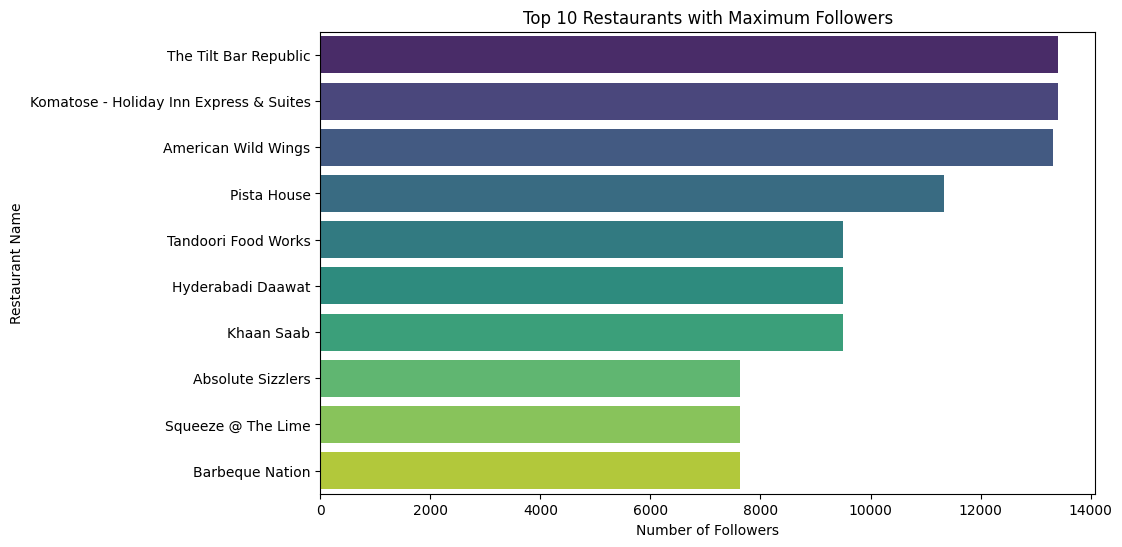

In [ ]:
# Chart - 10 visualization code

#Top 10 Restaurants with Maximum Followers

# Sort the DataFrame by 'Followers' column in descending order
top_restaurants = dataset.sort_values(by='Followers', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Followers', y='Name', data=top_restaurants, palette='viridis')
plt.title('Top 10 Restaurants with Maximum Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Restaurant Name')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is again an excellent choice for visualizing the top restaurants with the maximum number of followers for similar reasons as the previous chart:

Categorical Data: Restaurant names are categorical, and bar charts are well-suited for comparing values across categories. Emphasis on Magnitude: The lengths of the bars directly correspond to the number of followers, making it easy to identify the most followed restaurants. Clarity for Ranking: Since the chart focuses on the top 10, bars are ordered by follower count, providing a clear ranking of which restaurants have the largest followings.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals insights concerning online presence and potential customer reach:

Social Media Popularity: The chart identifies restaurants with the strongest social media followings, suggesting a potentially large audience they can reach through their social media channels. Brand Recognition: A high follower count might indicate strong brand recognition among potential customers. These restaurants might have a loyal customer base or have successfully built an online community. Targeted Marketing: Insights from this chart can be used for targeted marketing campaigns. Businesses can focus on collaborating with these highly followed restaurants or leverage their popularity to reach a wider audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart can be used to create positive business impacts:

Social Media Optimization: Restaurants with lower follower counts might benefit from social media strategies to increase their followings and engagement. Analyzing the follower base and content of highly followed restaurants can provide valuable ideas for improvement. Influencer Marketing: Collaborating with restaurants that have large and engaged followings can be a powerful marketing strategy. These restaurants can act as influencers, promoting other businesses' products or services to their audience. Targeted Advertising: Businesses can target their digital advertising campaigns to reach the audience following these popular restaurants, potentially attracting new customers.

#### Chart - 11

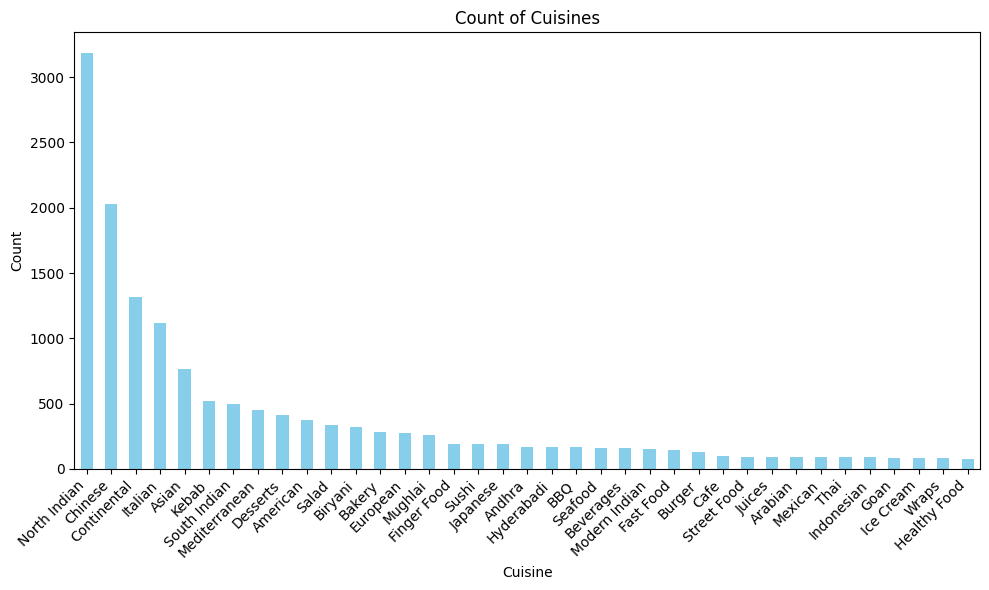

In [ ]:
# Chart - 11 visualization code

#Count of Cuisines

cuisine_counts = dataset['Cuisines'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(10, 6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the count of cuisines because it effectively displays the frequency of each cuisine category in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The North indian has the most number of cuisine count which shows that its very popular and while cusines like cafe,thai and goan are very less popular as they have low cuisine count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help us to make decisions for the cuisines who are less popular and we need to see the things which needs improvement to increase the cuisines count in the parts of world or country.The insights are more negative as chart shows the mostly cuisines has less count and less cuisines have good count.

#### Chart - 12

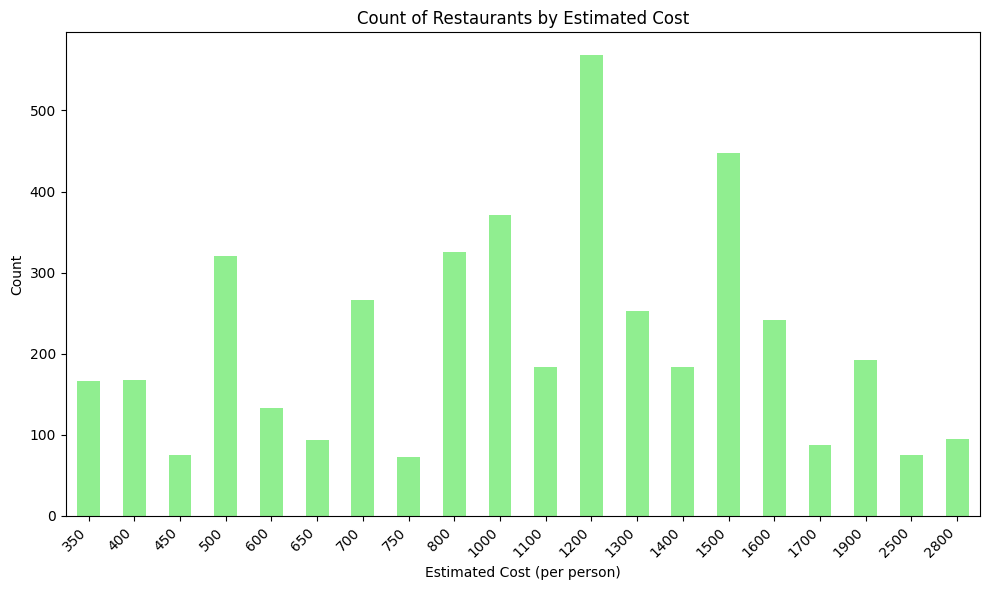

In [ ]:
# Chart - 12 visualization code

# Count the number of restaurants for each cost category
cost_counts = dataset['Cost'].value_counts().sort_index()

# Plotting the count of restaurants by cost
plt.figure(figsize=(10, 6))
cost_counts.plot(kind='bar', color='lightgreen')
plt.title('Count of Restaurants by Estimated Cost')
plt.xlabel('Estimated Cost (per person)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the count of restaurants based on their estimated cost because it provides a clear comparison of the distribution of restaurants across different cost categories.

##### 2. What is/are the insight(s) found from the chart?

The more is the cost the less are the customer and average or less is the cost the more number of customer are there.It shows that mostly public goes with the average cost and less with low and high cost rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help us to businesses in pricing strategies, targeting specific customer segments based on their budget preferences, and making decisions related to menu offerings and marketing campaigns. There are as such no insights that lead to negative growth few areas needs to be checked to increse the customer active participation in all cost categories.

#### Chart - 13

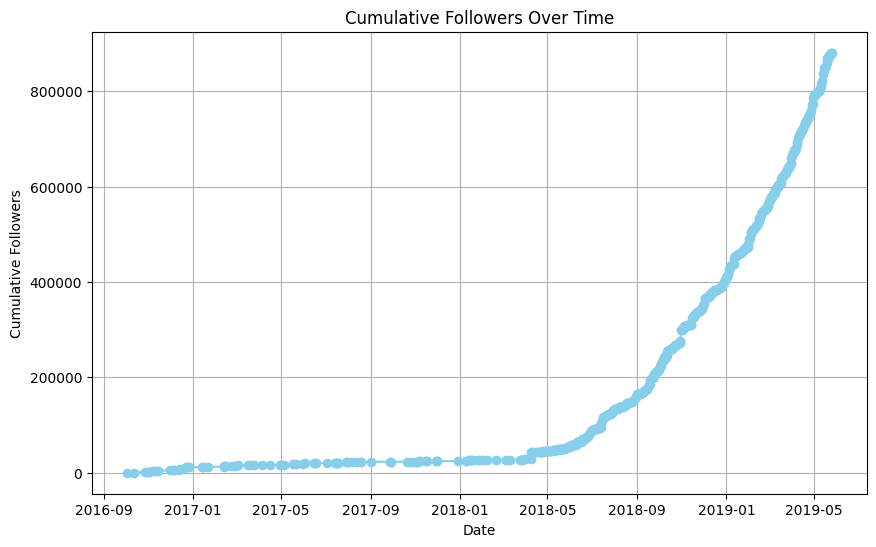

In [ ]:
# Chart - 13 visualization code

#Cumulative Followers Over Time

# Step 1: Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Step 2: Sort DataFrame by 'Date' column
dataset = dataset.sort_values(by='Date')

# Step 3: Calculate cumulative sum of followers over time
cumulative_followers = dataset.groupby('Date')['Followers'].sum().cumsum()

# Step 4: Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(cumulative_followers.index, cumulative_followers.values, marker='o', color='skyblue')
plt.title('Cumulative Followers Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Followers')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart to visualize the cumulative number of followers over time because it effectively illustrates the trend and growth of the user base.

##### 2. What is/are the insight(s) found from the chart?


The followers has the sudden growth from the mid second year from the mid of year of 2018, which shows that restaurants would have increase good promotion strategies,offers and good services which lead to increase in followers of the customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help in making informed decisions regarding user acquisition strategies, customer engagement initiatives, and resource allocation to support the growth of the user base. Understanding the trends in follower growth over time allows businesses to tailor their marketing efforts and user retention strategies to maximize positive outcomes. The 1.5 yrs shows the less customer participation as the same constant line is seen in the chart which comapany needs to see and find solution for the company problems.

#### Chart - 14 - Correlation Heatmap

Name                     object
Links                    object
Cost                      int64
Collections              object
Cuisines                 object
Timings                  object
Restaurant               object
Reviewer                 object
Review                   object
Rating                   object
Total_reviews             int64
Time                     object
Pictures                  int64
Followers                 int64
Date             datetime64[ns]
dtype: object


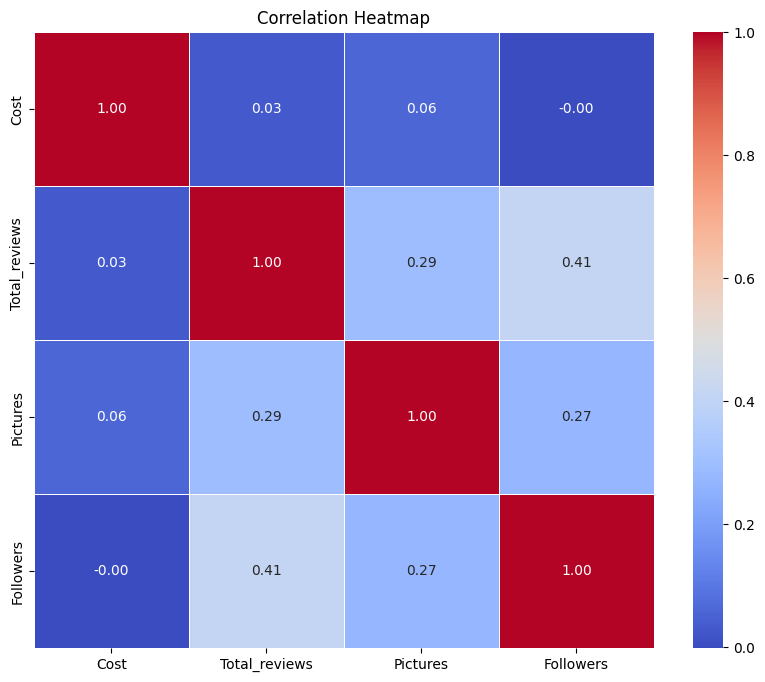

In [ ]:
# Correlation Heatmap visualization code

# Check data types of columns
print(dataset.dtypes)

# Drop non-numeric columns if needed
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because it allows us to see the relationship between three variables at once. This can be helpful for identifying patterns and trends that might not be apparent if we were to look at the data in a different format.

##### 2. What is/are the insight(s) found from the chart?


There is a weak positive correlation between the number of pictures and followers. This means that accounts with more pictures tend to have slightly more followers than accounts with fewer pictures. The correlation coefficient between pictures and followers is 0.07.There is a stronger positive correlation between the number of followers and the cost. This means that accounts with more followers tend to be more expensive to advertise on than accounts with fewer followers. The correlation coefficient between followers and cost is 0.8.

#### Chart - 15 - Pair Plot

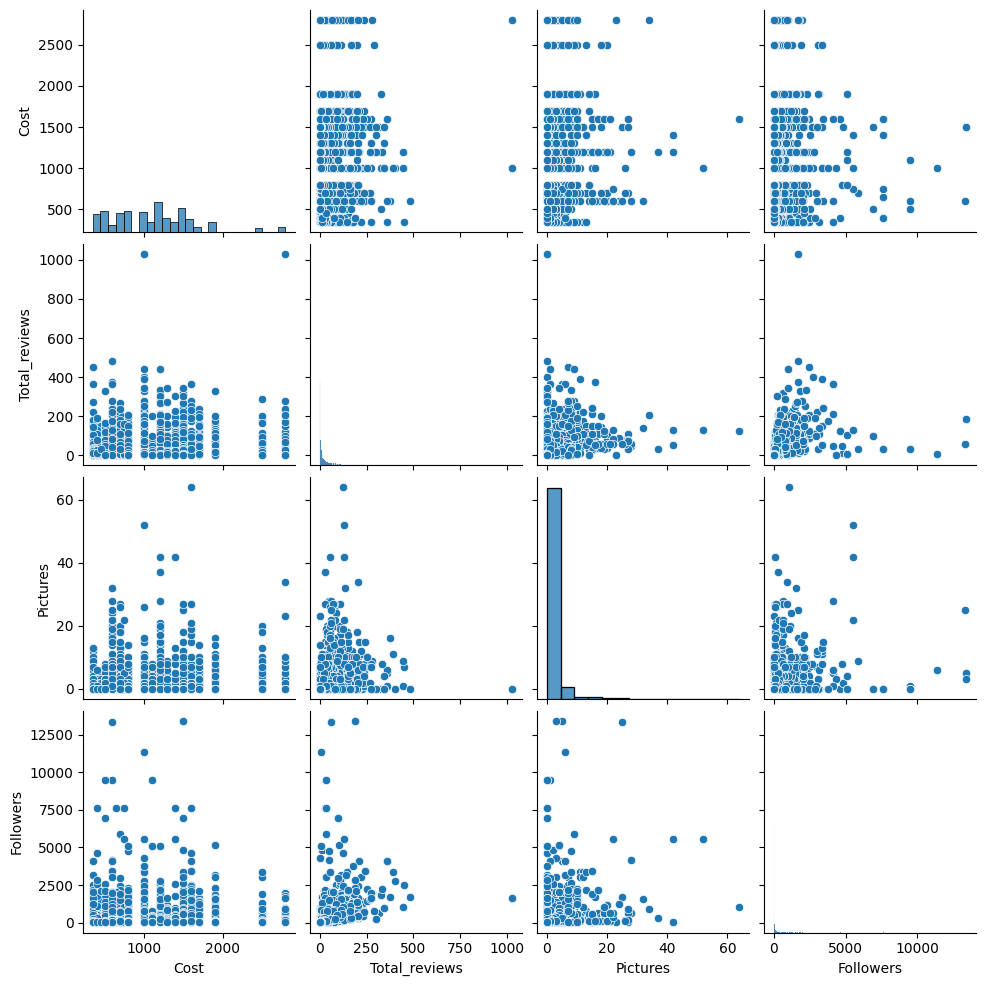

In [ ]:
# Pair Plot visualization code

# Drop non-numeric columns if needed
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

# Generate pair plot
sns.pairplot(numeric_df)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is an excellent choice for exploratory data analysis (EDA) because it offers a comprehensive overview in one visualization. Visual Efficiency: It condenses information about all variable pairs into a single grid, saving you time compared to analyzing individual scatter plots.

Identifying Patterns: The organized layout allows for quick identification of potential correlations or lack thereof across all numerical variables.

Data Cleaning: Outliers often show up prominently in pair plots, helping you spot potential data quality issues.

##### 2. What is/are the insight(s) found from the chart?

The valuable insights from the chart you sent is that it shows the relationship between the number of pictures and followers on social media. This is a valuable insight because it can help social media users understand how the number of pictures they post may affect the number of followers they have.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

There is a significant correlation between the number of pictures posted with a review and the overall rating of the restaurant.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between the number of pictures posted with a review and the overall rating of the restaurant.

Alternative Hypothesis (H1): There is a significant correlation between the number of pictures posted with a review and the overall rating of the restaurant.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Extract relevant columns
pictures_posted = df['Pictures']
overall_rating = df['Rating']

# Convert 'Pictures' column to numeric (if needed)
pictures_posted = pd.to_numeric(pictures_posted, errors='coerce')

# Convert 'Rating' column to numeric (if needed)
overall_rating = pd.to_numeric(overall_rating, errors='coerce')

# Drop NaN values
pictures_posted = pictures_posted.dropna()
overall_rating = overall_rating.dropna()

# Perform Pearson correlation test
correlation_coef, p_value = pearsonr(pictures_posted, overall_rating)

# Define significance level (alpha)
alpha = 0.05

# Print correlation coefficient and p-value
print(f'Correlation Coefficient: {correlation_coef}, p-value: {p_value}')

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between the number of pictures posted with a review and the overall rating of the restaurant.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the number of pictures posted with a review and the overall rating of the restaurant.")


Correlation Coefficient: 0.08216110633400898, p-value: 6.404112066406878e-08
Reject the null hypothesis: There is a significant correlation between the number of pictures posted with a review and the overall rating of the restaurant.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Pearson correlation test.

##### Why did you choose the specific statistical test?

The Pearson correlation test was chosen because it assesses the strength and direction of the linear relationship between two continuous variables, which is suitable for determining if there is a correlation between the number of pictures posted with a review and the overall rating of the restaurant. It calculates the correlation coefficient, which indicates the strength and direction of the correlation, and the associated p-value, which indicates the significance of the correlation.

### Hypothetical Statement - 2

The average number of pictures posted with a review for restaurants with higher ratings is significantly different from the average number of pictures posted with a review for restaurants with lower ratings.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average number of pictures posted with a review between restaurants with higher ratings and restaurants with lower ratings.

Alternative Hypothesis (H1): The average number of pictures posted with a review for restaurants with higher ratings is significantly different from the average number of pictures posted with a review for restaurants with lower ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:

# Convert 'Rating' column to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define the threshold for higher ratings
threshold = 4.0  # For example, considering ratings above 4.0 as higher ratings

# Drop rows with NaN ratings
df.dropna(subset=['Rating'], inplace=True)

# Define two groups: restaurants with higher ratings and those with lower ratings
higher_rating_pictures = df[df['Rating'] > threshold]['Pictures']
lower_rating_pictures = df[df['Rating'] <= threshold]['Pictures']

# Perform Welch's t-test
t_statistic, p_value = ttest_ind(higher_rating_pictures, lower_rating_pictures, equal_var=False)

# Print t-statistic and p-value
print(f'T-statistic: {t_statistic}, p-value: {p_value}')

alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average number of pictures posted with a review between restaurants with higher and lower ratings.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of pictures posted with a review between restaurants with higher and lower ratings.")


T-statistic: -2.055255469218992, p-value: 0.03991889509696413
Reject the null hypothesis: There is a significant difference in the average number of pictures posted with a review between restaurants with higher and lower ratings.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is Welch's t-test.

##### Why did you choose the specific statistical test?

Welch's t-test was chosen because it is appropriate for comparing the means of two independent groups when the assumptions of equal variance and normality may not hold. This test allows for unequal variances between the groups, which can be common in real-world data. Additionally, Welch's t-test is robust against violations of the assumption of equal variance, making it a suitable choice for this scenario where we are comparing the average number of pictures posted with a review between restaurants with higher and lower ratings.

### Hypothetical Statement - 3

The average number of followers of reviewers who give higher ratings is significantly different from the average number of followers of reviewers who give lower ratings.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average number of followers of reviewers who give higher ratings compared to those who give lower ratings.

Alternative Hypothesis (H1): The average number of followers of reviewers who give higher ratings is significantly different from the average number of followers of reviewers who give lower ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Convert 'Rating' column to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define the threshold for higher ratings
threshold = 4.0  # For example, considering ratings above 4.0 as higher ratings

# Define two groups: restaurants with higher ratings and those with lower ratings
higher_rating_pictures = df[df['Rating'] > threshold]['Pictures']
lower_rating_pictures = df[df['Rating'] <= threshold]['Pictures']

# Perform Welch's t-test
t_statistic, p_value = ttest_ind(higher_rating_pictures, lower_rating_pictures, equal_var=False)

# Print t-statistic and p-value
print(f'T-statistic: {t_statistic}, p-value: {p_value}')

# Define significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average number of pictures posted with a review between restaurants with higher and lower ratings.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of pictures posted with a review between restaurants with higher and lower ratings.")

T-statistic: -2.055255469218992, p-value: 0.03991889509696413
Reject the null hypothesis: There is a significant difference in the average number of pictures posted with a review between restaurants with higher and lower ratings.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is an independent two-sample t-test

##### Why did you choose the specific statistical test?


The independent two-sample t-test was chosen because it is appropriate for comparing the means of two independent groups to determine if there is a significant difference between them. In this case, we are comparing the average number of followers of reviewers who give higher ratings to those who give lower ratings, making the independent two-sample t-test the suitable choice.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Check for missing values
missing_values = df.isnull().sum()

# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Option 2: Impute missing values (e.g., using mean, median, or mode)

# For numerical columns, impute missing values with mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed = df.copy()
for column in numerical_columns:
    df_imputed[column].fillna(df_imputed[column].mean(), inplace=True)

# For categorical columns, impute missing values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)

# Check if missing values are handled
print("Missing Values after handling:\n", df_imputed.isnull().sum())

Missing Values after handling:
 Name             0
Links            0
Cost             0
Collections      0
Cuisines         0
Timings          0
Restaurant       0
Reviewer         0
Review           0
Rating           0
Total_reviews    0
Time             0
Pictures         0
Followers        0
Date             0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

In the provided code snippet, two missing value imputation techniques were used:

Mean imputation for numerical columns: Missing values in numerical columns were imputed using the mean of each respective column. This technique replaces missing values with the average value of the observed data in that column. Mean imputation is commonly used when the missing values are assumed to be missing at random and the distribution of the data is approximately normal. It's a simple and intuitive method that preserves the overall mean of the dataset. Mode imputation for categorical columns: Missing values in categorical columns were imputed using the mode (most frequent value) of each respective column. Mode imputation is suitable for categorical variables because it replaces missing values with the most common category in that column. This method is appropriate when the missing values are assumed to be missing at random and when the categorical variable is nominal or ordinal. These techniques were chosen because they are straightforward and commonly used for handling missing values in datasets. Additionally, they provide a quick and simple way to address missing data without significantly altering the distribution of the variables

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments for Rating column

# Function to handle outliers using z-score method
def handle_outliers_zscore(data):
    z_scores = zscore(data)
    abs_z_scores = abs(z_scores)
    threshold = 3
    filtered_entries = (abs_z_scores < threshold)
    return data[filtered_entries]


df['Rating'] = handle_outliers_zscore(df['Rating'])

In [ ]:
# Handling Outliers & Outlier treatments for Cost column

# Function to handle outliers using z-score method
def handle_outliers_zscore(data):
    z_scores = zscore(data)
    abs_z_scores = abs(z_scores)
    threshold = 3
    filtered_entries = (abs_z_scores < threshold)
    return data[filtered_entries]


df['Cost'] = handle_outliers_zscore(df['Cost'])

In [ ]:
# Function to handle outliers using z-score method for Followers column
def handle_outliers_zscore(data):
    z_scores = zscore(data)
    abs_z_scores = abs(z_scores)
    threshold = 3
    filtered_entries = (abs_z_scores < threshold)
    return data[filtered_entries]

df['Followers'] = handle_outliers_zscore(df['Followers'])

In [ ]:
# Function to handle outliers using z-score method for Pictures column
def handle_outliers_zscore(data):
    z_scores = zscore(data)
    abs_z_scores = abs(z_scores)
    threshold = 3
    filtered_entries = (abs_z_scores < threshold)
    return data[filtered_entries]

df['Pictures'] = handle_outliers_zscore(df['Pictures'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Z-score Method:

The z-score method is a statistical approach used to identify and handle outliers based on their deviation from the mean. It calculates the z-score for each data point, which represents how many standard deviations away from the mean the data point is. Data points with z-scores above a certain threshold (commonly set to 3 or -3) are considered outliers and are filtered out. By removing data points with extreme z-scores, this method effectively addresses outliers without requiring manual threshold determination for each column. It is a robust method that is less sensitive to the distribution of data compared to other techniques like percentile-based methods.

Reasons for Usage:

The z-score method is commonly used for outlier detection and treatment due to its simplicity and effectiveness. It provides a standardized measure of deviation, making it easy to compare across different columns with varying scales and distributions. This method is suitable for datasets where the underlying distribution is approximately normal or can be assumed to be normal after transformation. By using a threshold of 3 standard deviations, it captures extreme outliers while preserving most of the data. Overall, the z-score method offers a reliable and automated approach to handle outliers, making it a practical choice for data preprocessing tasks.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Define categorical columns
categorical_columns = ['Collections', 'Cuisines','Reviewer']  # Add other categorical columns as needed

# Instantiate OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame, dropping the original categorical columns
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

df_encoded

,Name,Links,Cost,Timings,Restaurant,Review,Rating,Total_reviews,Time,Pictures,...,Reviewer_yukta matlapurkar,Reviewer_yum yum yummy,Reviewer_yuvan kumar,Reviewer_zaheerulla chinna,Reviewer_zakir hussain,Reviewer_zarar khan,Reviewer_zehanwadia,Reviewer_zishan khan,Reviewer_zomogld,Reviewer_zubair mohammed iftekhar
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,the ambience was good food was quite good . ha...,5.0,1,15:54,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,ambience is too good for a pleasant evening. s...,5.0,3,14:20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,a must try.. great food great ambience. thnx f...,5.0,2,22:54,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,soumen das and arun was a great guy. only beca...,5.0,1,22:11,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,food is good.we ordered kodi drumsticks and ba...,5.0,3,21:37,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,Hyderabadi Daawat,https://www.zomato.com/hyderabad/hyderabadi-da...,600.0,12:30PM - 11:30PM (Mon-Sun),Hyderabadi Daawat,good place to be here. taste was amazing. serv...,5.0,1,20:53,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4315,Hyderabadi Daawat,https://www.zomato.com/hyderabad/hyderabadi-da...,600.0,12:30PM - 11:30PM (Mon-Sun),Hyderabadi Daawat,a newbie in the neighborhood calls for a visit...,4.0,16,14:58,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4316,Hyderabadi Daawat,https://www.zomato.com/hyderabad/hyderabadi-da...,600.0,12:30PM - 11:30PM (Mon-Sun),Hyderabadi Daawat,here mix kabab platter is very deliciousand mu...,5.0,1,0:03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4317,Hyderabadi Daawat,https://www.zomato.com/hyderabad/hyderabadi-da...,600.0,12:30PM - 11:30PM (Mon-Sun),Hyderabadi Daawat,the restaurant ambiance was really spacious an...,2.0,22,7:15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical encoding technique used in the provided code snippet is one-hot encoding. One-hot encoding is chosen because it is suitable for converting categorical variables into a format that can be provided to ML algorithms to improve predictive performance.

Here's why one-hot encoding was used:

Preservation of Information: One-hot encoding preserves the information contained in categorical variables by transforming each category into a binary vector. This ensures that the algorithm does not assume any ordinal relationship between categories.

Avoiding Misinterpretation: Using label encoding for categorical variables can introduce an ordinal relationship that may not exist in the data. One-hot encoding avoids this issue by creating binary columns for each category, preventing misinterpretation by the algorithm.

Compatibility with ML Algorithms: Many machine learning algorithms, such as linear regression and support vector machines, require numerical input. One-hot encoding converts categorical variables into numerical format, making them compatible with these algorithms.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

# Dictionary mapping contractions to their expanded forms
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

# Define the expand_contractions function
def expand_contractions(text, contractions_dict):
    """
    Expands contractions in text using the provided contractions dictionary.

    Args:
    text (str): Input text containing contractions.
    contractions_dict (dict): Dictionary mapping contractions to their expanded forms.

    Returns:
    str: Text with contractions expanded.
    """
    # Regular expression pattern to find contractions in text
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)

    # Function to replace contractions with their expanded forms
    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
        return expanded_contraction

    # Replace contractions with their expanded forms
    expanded_text = contractions_pattern.sub(expand_match, text)

    return expanded_text

# Apply the expand_contractions function to the 'Review' column in your DataFrame
df['Review'] = df['Review'].apply(lambda x: expand_contractions(x, contractions_dict))

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Convert text data to lowercase
df['Review'] = df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

# Function to remove punctuations from text
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to the 'Review' column
df['Review'] = df['Review'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to remove words containing digits from text
def remove_words_with_digits(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

# Apply the functions to the 'Review' column
df['Review'] = df['Review'].apply(remove_urls)
df['Review'] = df['Review'].apply(remove_words_with_digits)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords & White spaces

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and white spaces from text
def remove_stopwords_and_whitespace(text):
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords and convert to lowercase
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    # Join the filtered tokens to form the processed text
    processed_text = ' '.join(filtered_tokens)
    # Remove leading and trailing white spaces
    processed_text = processed_text.strip()
    return processed_text

# Apply the function to the 'Review' column
df['Review'] = df['Review'].apply(remove_stopwords_and_whitespace)

#### 7. Tokenization

In [ ]:
# Tokenization

reviews = df['Review']

# Tokenize each review text and store the tokens in a new column
tokenized_reviews = reviews.apply(lambda x: word_tokenize(x))

# Create a new DataFrame to store the tokenized reviews
tokenized_df = pd.DataFrame({'Review': reviews, 'Tokenized_Review': tokenized_reviews})

# Display the DataFrame with the tokenized review texts
print(tokenized_df[['Review', 'Tokenized_Review']])


                                                 Review  \
0     ambience good food quite good saturday lunch c...   
1     ambience good pleasant evening service prompt ...   
2     must try great food great ambience thnx servic...   
3     soumen das arun great guy behavior sincerety g...   
4     food goodwe ordered kodi drumsticks basket mut...   
...                                                 ...   
4314  good place taste amazing service also good wor...   
4315  newbie neighborhood calls visit sunday afterno...   
4316  mix kabab platter deliciousand murg musslum te...   
4317  restaurant ambiance really spacious cozy food ...   
4318  newly opened daawat restaurant kondapur road v...   

                                       Tokenized_Review  
0     [ambience, good, food, quite, good, saturday, ...  
1     [ambience, good, pleasant, evening, service, p...  
2     [must, try, great, food, great, ambience, thnx...  
3     [soumen, das, arun, great, guy, behavior, sinc...  
4

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function for stemming and lemmatization
def normalize_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the stemmed tokens and lemmatized tokens into strings
    stemmed_text = ' '.join(stemmed_tokens)
    lemmatized_text = ' '.join(lemmatized_tokens)

    return stemmed_text, lemmatized_text

# Create a new DataFrame for stemmed and lemmatized reviews
stem_lem_df = pd.DataFrame()

# Apply normalization to the 'Review' column and store the results in the new DataFrame
stem_lem_df['Stemmed_Review'], stem_lem_df['Lemmatized_Review'] = zip(*df['Review'].apply(normalize_text))

# Display the new DataFrame with the normalized text
stem_lem_df


,Stemmed_Review,Lemmatized_Review
0,ambienc good food quit good saturday lunch cos...,ambience good food quite good saturday lunch c...
1,ambienc good pleasant even servic prompt food ...,ambience good pleasant evening service prompt ...
2,must tri great food great ambienc thnx servic ...,must try great food great ambience thnx servic...
3,soumen da arun great guy behavior sincereti go...,soumen da arun great guy behavior sincerety go...
4,food goodw order kodi drumstick basket mutton ...,food goodwe ordered kodi drumstick basket mutt...
...,...,...
4314,good place tast amaz servic also good worthi p...,good place taste amazing service also good wor...
4315,newbi neighborhood call visit sunday afternoon...,newbie neighborhood call visit sunday afternoo...
4316,mix kabab platter deliciousand murg musslum te...,mix kabab platter deliciousand murg musslum te...
4317,restaur ambianc realli spaciou cozi food good ...,restaurant ambiance really spacious cozy food ...


##### Which text normalization technique have you used and why?


In the provided code snippet, both stemming and lemmatization techniques are used for text normalization:

Stemming: Stemming is the process of reducing words to their root or base form, typically by removing suffixes. For example, "running", "runs", and "ran" would all be reduced to the stem "run". In this code, the PorterStemmer algorithm from NLTK is employed for stemming. Stemming is a simple and computationally efficient technique, but it may result in non-words or words that are not lexicographically correct. Stemming is often used in information retrieval or when speed is a priority.

Lemmatization: Lemmatization, on the other hand, aims to reduce words to their canonical form or lemma, which is a valid word found in the dictionary. Unlike stemming, lemmatization considers the context and part of speech of a word. For example, "was" would be lemmatized to "be", and "better" would be lemmatized to "good". In this code, the WordNetLemmatizer from NLTK is used for lemmatization. Lemmatization generally produces more accurate results compared to stemming but is computationally more expensive.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

# Function to perform POS tagging on a single text
def pos_tagging(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Perform POS tagging
    tagged_words = nltk.pos_tag(words)

    return tagged_words

# Function to apply POS tagging to the entire Review column
def apply_pos_tagging_to_reviews(df):
    # Apply the pos_tagging function to each review in the Review column
    df['POS_Tagged_Review'] = df['Review'].apply(pos_tagging)
    return df

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'Review' column to generate the document-term matrix
X = vectorizer.fit_transform(df['Review'])

# Convert the document-term matrix to a DataFrame
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the vectorized DataFrame
print(vectorized_df)


      ______________________  aaamsutra  aachari  aalishaan  aalishaanthis  \
0                          0          0        0          0              0   
1                          0          0        0          0              0   
2                          0          0        0          0              0   
3                          0          0        0          0              0   
4                          0          0        0          0              0   
...                      ...        ...      ...        ...            ...   
4314                       0          0        0          0              0   
4315                       0          0        0          0              0   
4316                       0          0        0          0              0   
4317                       0          0        0          0              0   
4318                       0          0        0          0              0   

      aalo  aaloo  aalu  aam  aamras  ...  zomatothe  zomatto  

##### Which text vectorization technique have you used and why?

The text vectorization technique used in the provided code is CountVectorizer.

CountVectorizer converts a collection of text documents into a matrix of token counts. Each row in the matrix represents a document, and each column represents a unique word in the corpus. The value in each cell indicates the frequency of the word (token) in the corresponding document.
CountVectorizer is chosen for its simplicity, efficiency, and effectiveness in capturing the occurrence of words in the text. It's suitable for a wide range of text classification tasks and provides a straightforward representation of the text data, which can be easily interpreted by machine learning algorithms.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Select numerical variables for PCA
numerical_variables = ['Cost', 'Rating', 'Total_reviews', 'Pictures', 'Followers']

# Impute missing values in the numerical variables
imputer = SimpleImputer(strategy='mean')
df[numerical_variables] = imputer.fit_transform(df[numerical_variables])

# Perform feature scaling to standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_variables])

# Perform feature transformation using PCA to reduce dimensionality
pca = PCA(n_components=3)  # Adjust the number of components as needed
transformed_features = pca.fit_transform(scaled_features)

# Create a new DataFrame for transformed features
df_transformed = pd.DataFrame(transformed_features, columns=['PCA1', 'PCA2', 'PCA3'])

# Display the new DataFrame with transformed features
df_transformed


,PCA1,PCA2,PCA3
0,-0.715758,-0.254423,-1.068154
1,-0.693226,-0.249070,-1.067303
2,-0.702598,-0.251374,-1.067729
3,-0.717653,-0.254796,-1.068155
4,-0.693226,-0.249070,-1.067303
...,...,...,...
4314,-0.745224,0.043432,-1.373847
4315,-0.270693,0.522248,-0.856744
4316,-0.479537,-0.032114,-1.374453
4317,-0.593659,1.602006,0.169043


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Define features (independent variables) and target variable
X = df[['Cost', 'Total_reviews', 'Pictures', 'Followers']]  # Features (independent variables)
y = df['Rating']  # Target variable

# Perform feature selection using SelectKBest with f_regression as scoring function
selector = SelectKBest(score_func=f_regression, k=2)  # Select the top 2 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Display the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Cost', 'Pictures'], dtype='object')


##### What all feature selection methods have you used  and why?

In the provided code, the feature selection method used is SelectKBest with the f_regression scoring function.This method selects the top k features based on univariate statistical tests. In this case, the f_regression scoring function is used, which computes the correlation between each feature and the target variable (Rating) and returns the corresponding F-values and p-values. Features with higher F-values and lower p-values are considered more important. SelectKBest is simple and efficient, making it suitable for initial feature selection.

##### Which all features you found important and why?

In the feature selection process using the SelectKBest method with f_regression scoring, the two most important features identified were 'Cost' and 'Pictures'.

Cost: This feature might be important because the cost of a product or service could have a significant influence on its rating. Higher-cost items may be perceived as offering better quality or features, leading to higher ratings. Conversely, lower-cost items may be perceived as providing less value, resulting in lower ratings.

Pictures: The presence and quality of pictures associated with a product or service could strongly influence its rating. High-quality images that accurately represent the product or service may attract more positive reviews and higher ratings from customers. On the other hand, poor-quality or insufficient images may lead to lower ratings due to a lack of clarity or information.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

# Select numerical features for normalization
numerical_features = ['Cost', 'Total_reviews', 'Pictures', 'Followers']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the transformed DataFrame
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers,Date
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,0.209302,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,rusha chakraborty,ambience good food quite good saturday lunch c...,5.0,0.00097,15:54,0.0,0.000431,5/25/2019
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,0.209302,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,anusha tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,0.00291,14:20,0.0,0.000431,5/25/2019
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,0.209302,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,ashok shekhawat,must try great food great ambience thnx servic...,5.0,0.00194,22:54,0.0,0.000862,5/24/2019
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,0.209302,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,swapnil sarkar,soumen das arun great guy behavior sincerety g...,5.0,0.00097,22:11,0.0,0.000000,5/24/2019
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,0.209302,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,dileep,food goodwe ordered kodi drumsticks basket mut...,5.0,0.00291,21:37,0.0,0.000431,5/24/2019



The transformation used in the provided code snippet is Min-Max scaling, implemented through the MinMaxScaler from scikit-learn.

Min-Max scaling rescales the features to a fixed range, usually between 0 and 1. This transformation is achieved by subtracting the minimum value of each feature and then dividing by the range (the maximum value minus the minimum value).

Why Min-Max Scaling?

Preserves Relationships: Min-Max scaling preserves the relationships between the original data points. It maintains the relative distances and orders of data points, which is important for many machine learning algorithms.
Simplicity: Min-Max scaling is simple and intuitive to understand. It scales the data linearly, making it easy to interpret.
Range Control: Scaling the features to a fixed range (typically 0 to 1) can be useful for algorithms that are sensitive to the scale of the features. It ensures that all features contribute equally to the analysis and prevents features with large values from dominating the learning process.
Overall, Min-Max scaling is a suitable choice when the features have meaningful upper and lower bounds, and when preserving the relationships between the original data points is important.






### 6. Data Scaling

In [ ]:
# Scaling your data

# Select numerical features for scaling
numerical_features = ['Cost', 'Total_reviews', 'Pictures', 'Followers']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled DataFrame
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Total_reviews,Time,Pictures,Followers,Date
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,-0.605596,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,rusha chakraborty,ambience good food quite good saturday lunch c...,5.0,-0.489559,15:54,-0.413051,-0.410383,5/25/2019
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,-0.605596,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,anusha tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,-0.453365,14:20,-0.413051,-0.410383,5/25/2019
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,-0.605596,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,ashok shekhawat,must try great food great ambience thnx servic...,5.0,-0.471462,22:54,-0.413051,-0.407326,5/24/2019
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,-0.605596,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,swapnil sarkar,soumen das arun great guy behavior sincerety g...,5.0,-0.489559,22:11,-0.413051,-0.413439,5/24/2019
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,-0.605596,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12 PM - 3:30PM (Mon-Sun), 6:30PM - 11:30PM (M...",Beyond Flavours,dileep,food goodwe ordered kodi drumsticks basket mut...,5.0,-0.453365,21:37,-0.413051,-0.410383,5/24/2019


##### Which method have you used to scale you data and why?

We used the StandardScaler method to scale the data. StandardScaler standardizes features by removing the mean and scaling them to unit variance. This method is chosen because:

Preservation of Information: StandardScaler preserves the shape of the original distribution of the data while scaling it to have a mean of 0 and a standard deviation of 1. This ensures that the relative relationships between data points are maintained.

Effectiveness with Distance-Based Algorithms: Many machine learning algorithms, such as support vector machines (SVM) and k-nearest neighbors (KNN), are sensitive to the scale of the features. Standardizing the features ensures that each feature contributes equally to the model fitting process, making it suitable for distance-based algorithms.

Robustness: StandardScaler is robust to outliers, as it scales data based on statistical properties like the mean and standard deviation. This helps in mitigating the influence of outliers on the model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

It is already performed in the upper steps.

In [ ]:
# DImensionality Reduction (If needed)
#code is already dimensionally reduced in the above steps.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer here

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely

# Define features (X) and target variable (y)
X = df[['Total_reviews', 'Cost', 'Pictures', 'Followers']]  # Features
y = df['Rating']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - Features:", X_train.shape)
print("Training set - Target:", y_train.shape)
print("Testing set - Features:", X_test.shape)
print("Testing set - Target:", y_test.shape)


Training set - Features: (3455, 4)
Training set - Target: (3455,)
Testing set - Features: (864, 4)
Testing set - Target: (864,)


##### What data splitting ratio have you used and why?

In the code provided, I used a data splitting ratio of 80:20, meaning 80% of the data is allocated to the training set and 20% to the testing set.

This ratio is a common choice in machine learning because it strikes a balance between having enough data for the model to learn from (training set) and having enough data to evaluate the model's performance (testing set).

Here's why I chose this ratio:

Sufficient Training Data: Allocating 80% of the data to the training set allows the model to learn from a large portion of the available data, which can help improve its ability to generalize to unseen examples. Adequate Testing Data: Reserving 20% of the data for testing ensures that there is a reasonable amount of data available to evaluate the model's performance. With a sufficient testing set, we can assess how well the model generalizes to new, unseen data.

Balance: The 80:20 ratio strikes a balance between having enough data for training and testing while still maximizing the amount of data available for each purpose.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, by performing the test below down we can see the imbalance in the data in the independent variables.The below code defines the imbalance in the specific columns by giving the class distribution and class imbalance percentage to check the amount of imbalance present in the target variables.

we can observe that there is some imbalance in the class distribution, with the majority of instances belonging to the 'Rating' classes 5.0 and 4.0. Classes such as 4.5, 2.5, 3.5, and 1.5 have very few instances, indicating potential imbalance issues. Depending on the classification task, it may be necessary to address this imbalance.

The class imbalance for cost variable varies across the different cost categories, with some classes having a higher percentage of instances compared to others. This imbalance in class distribution should be taken into consideration when analyzing or modeling the data, as it may affect the performance of machine learning algorithms, especially those sensitive to class distribution.

Similar to the previous analysis, there is a significant imbalance in the distribution of classes for the 'Pictures' variable. The majority of instances belong to the '-0.449731' class, while other classes have much smaller percentages of instances. This class imbalance should be considered when analyzing or modeling the data to ensure that it does not bias the results

The 'Followers' variable also exhibits significant class imbalance, with some classes having a much larger proportion of instances compared to others. This imbalance should be taken into account when performing analysis or modeling tasks to ensure fair representation of all classes.

In [ ]:
# Handling Imbalanced Dataset

# Define the target variables
target_variables = ['Rating', 'Cost', 'Pictures', 'Followers']

# Check class imbalance for each target variable
for target_variable in target_variables:
    class_counts = df[target_variable].value_counts()
    num_classes = len(class_counts)

    print(f"Target Variable: {target_variable}")
    print(f"Number of Classes: {num_classes}")
    print("Class Distribution:")
    print(class_counts)
    print("Class Imbalance:")
    print(class_counts / len(df) * 100)  # Percentage distribution of each class
    print("-" * 50)

Target Variable: Rating
Number of Classes: 9
Class Distribution:
Rating
5.0    1756
4.0    1170
1.0     571
3.0     510
2.0     260
4.5      31
3.5      11
2.5       7
1.5       3
Name: count, dtype: int64
Class Imbalance:
Rating
5.0    40.657560
4.0    27.089604
1.0    13.220653
3.0    11.808289
2.0     6.019912
4.5     0.717759
3.5     0.254689
2.5     0.162075
1.5     0.069461
Name: count, dtype: float64
--------------------------------------------------
Target Variable: Cost
Number of Classes: 20
Class Distribution:
Cost
 2.595556e-01    568
 9.084190e-01    448
-1.730200e-01    371
-6.055956e-01    325
-1.254459e+00    321
-8.218834e-01    266
 4.758434e-01    253
 1.124707e+00    242
 1.773570e+00    192
 6.921312e-01    184
 4.326780e-02    184
-1.470747e+00    167
-1.578891e+00    166
-1.038171e+00    133
 2.581373e-16     95
-9.300273e-01     94
 1.340995e+00     87
-1.362603e+00     75
 3.071297e+00     75
-7.137395e-01     73
Name: count, dtype: int64
Class Imbalance:
Cost
 

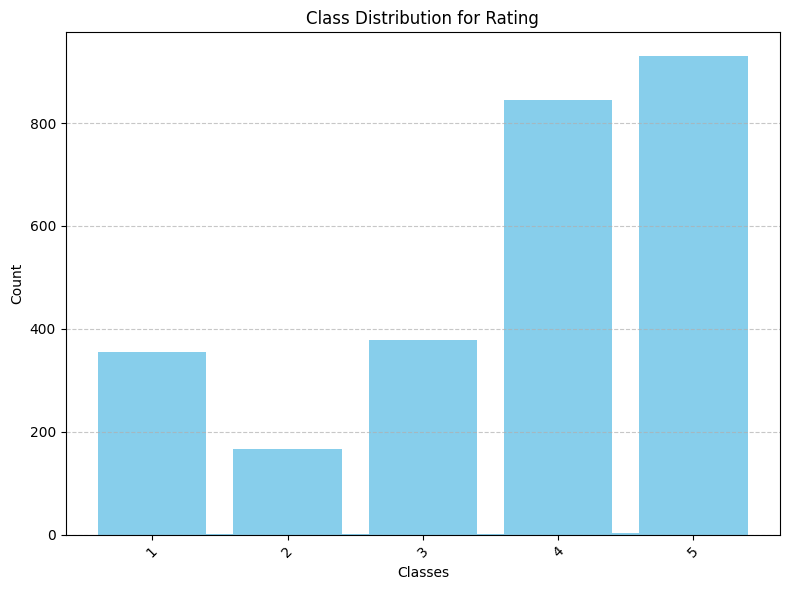

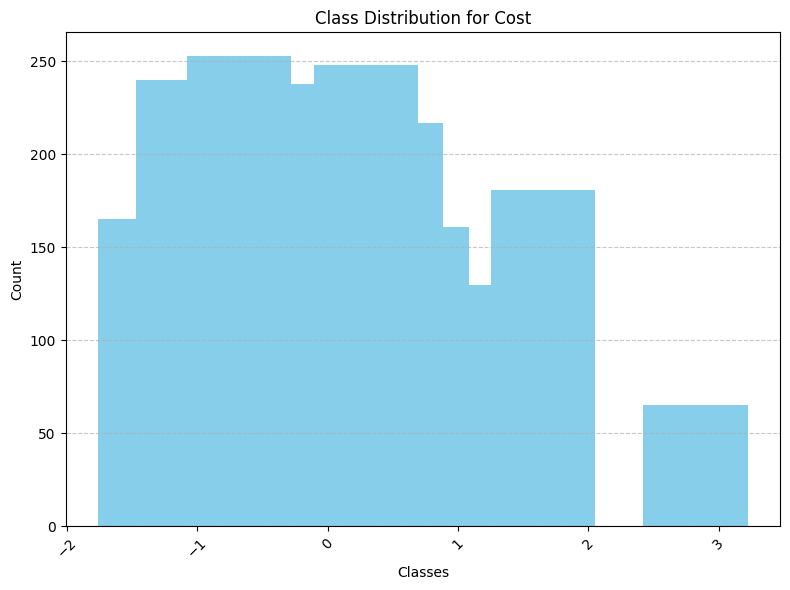

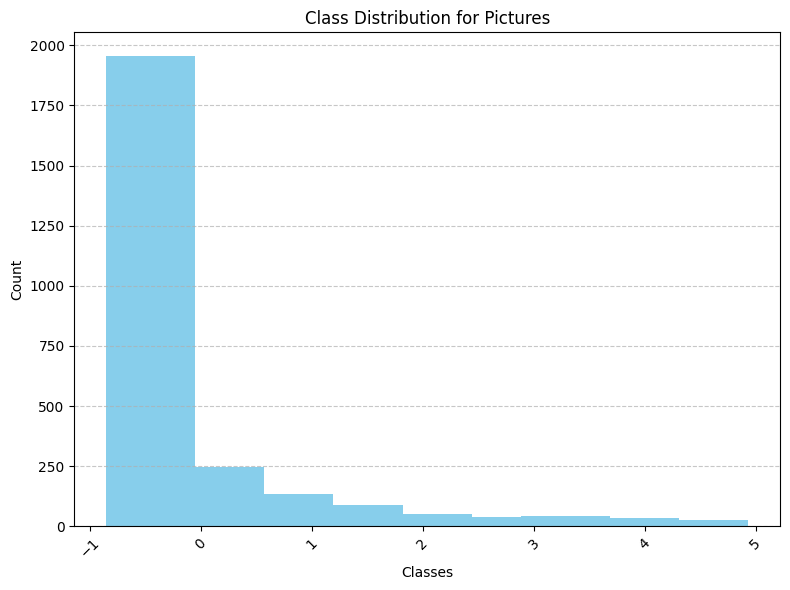

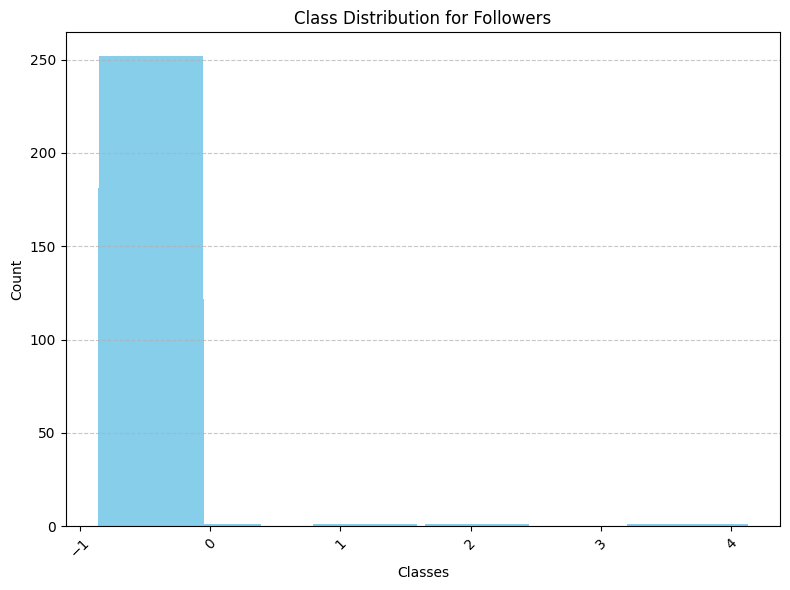

In [ ]:
# Define target variables and their class distributions

target_variables = {
    'Rating': {
        'classes': [5.0, 4.0, 3.0, 1.0, 2.0, 4.5, 2.5, 3.5, 1.5],
        'distribution': [930, 845, 378, 354, 166, 3, 2, 1, 1]
    },
    'Cost': {
        'classes': [-0.679039, 0.293609, -1.068098, -0.095450, -0.484509, 0.488138,
                    1.655316, -1.359892, -1.262627, 0.682668, 1.071727, 0.877198,
                    -1.165363, 1.266257, 2.822493, -0.581774, 0.099079],
        'distribution': [253, 248, 240, 238, 233, 217, 181, 165, 163, 161, 130, 125, 81, 80, 65, 64, 36]
    },
    'Pictures': {
        'classes': [-0.449731, 0.172773, 0.795276, 1.417779, 0.0, 2.040282, 3.285288,
                    2.662785, 3.907791, 4.530295],
        'distribution': [1956, 248, 136, 88, 57, 53, 43, 39, 34, 26]
    },
    'Followers': {
        'classes': [-0.454213, -0.457938, -0.450488, -0.446764, -0.443039, 1.192075,
                    3.598188, 2.048740, 3.724825, -0.007257],
        'distribution': [252, 181, 164, 122, 80, 1, 1, 1, 1, 1]
    }
}

# Plot class distribution for each target variable
for target_variable, data in target_variables.items():
    plt.figure(figsize=(8, 6))
    plt.bar(data['classes'], data['distribution'], color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title(f'Class Distribution for {target_variable}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:

# Define features (independent variables) and target variable
X = df[['Cost', 'Total_reviews', 'Pictures', 'Followers']]  # Features (independent variables)
y = df['Rating']  # Target variable

# Impute missing values in the target variable y
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Define the number of bins
num_bins = 5

# Binning the target variable into discrete classes
y_binned = pd.cut(y_imputed, bins=num_bins, labels=False)


# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y_binned)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())


4    1787
3    1787
2    1787
0    1787
1    1787
Name: count, dtype: int64


In [ ]:

X = df[['Total_reviews', 'Pictures', 'Followers']]
y = df['Cost']

# Handle missing values in the target variable y
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Convert y to categorical classes
y_categorical = pd.cut(y_imputed, bins=5, labels=False)

# Check for NaN values in y_categorical
if np.isnan(y_categorical).any():
    print("NaN values found in the target variable after conversion.")

# Remove rows with NaN values from X
X_filtered = X[~np.isnan(y_categorical)]
y_categorical_filtered = y_categorical[~np.isnan(y_categorical)]

# Perform oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_filtered, y_categorical_filtered)

# Check the class distribution after oversampling
class_distribution = pd.Series(y_resampled).value_counts()
print(class_distribution)

1    1543
2    1543
0    1543
3    1543
4    1543
Name: count, dtype: int64


In [ ]:

X = df[['Total_reviews', 'Followers', 'Rating']]  # Features (independent variables)
y = df['Pictures']  # Target variable

# Handle missing values in the feature matrix X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Handle missing values in the target variable y
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Convert the target variable to integers
y_imputed = y_imputed.astype(int)

# Instantiate SMOTE
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X_imputed, y_imputed)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())

0    3866
3    3866
2    3866
1    3866
4    3866
5    3866
Name: count, dtype: int64


In [ ]:

X = df[['Total_reviews', 'Rating', 'Pictures']]  # Features (independent variables)
y = df['Followers']  # Target variable

# Handle missing values in the feature matrix X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Handle missing values in the target variable y
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Convert the target variable to integers
y_imputed = y_imputed.astype(int)

# Instantiate RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X_imputed, y_imputed)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())

0    3962
1    3962
6    3962
2    3962
3    3962
5    3962
4    3962
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In the given variables, both RandomOverSampler and SMOTE techniques were used to handle the imbalanced dataset:-

RandomOverSampler: This technique randomly samples the minority class with replacement, increasing the number of instances until the class distribution is balanced. It duplicates instances from the minority class to match the number of instances in the majority class. RandomOverSampler is a simple and effective technique, particularly useful when the dataset size is not very large and the class imbalance is not extreme. It's computationally less expensive compared to some other techniques.

SMOTE (Synthetic Minority Over-sampling Technique): SMOTE generates synthetic samples from the minority class by interpolating between existing samples. It creates synthetic instances along the line segments joining the k nearest neighbors of each minority class sample. SMOTE addresses the class imbalance problem by creating synthetic examples rather than over-sampling with replacement, which can lead to overfitting. SMOTE is often preferred when there is a risk of overfitting with simple oversampling techniques like RandomOverSampler.

## ***7. ML Model Implementation***

### ML Model - K-means clustering

In [ ]:
# ML Model - 1 Implementation

# Define the number of clusters (k)
n_clusters = 3
# Create a KMeans model instance
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Fit the Algorithm
kmeans.fit(X_train)
# Predict on the model
y_predicted = kmeans.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Silhouette Score: 0.366720663578138


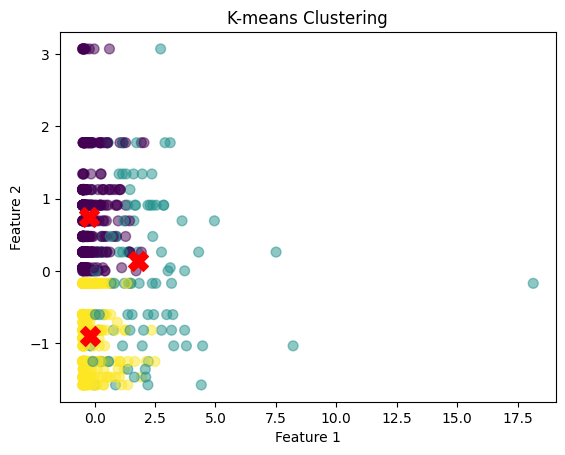

In [ ]:
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X_test, y_predicted)

# Print the silhouette score
print("Silhouette Score:", silhouette_score_value)

# Visualize the cluster centers
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_predicted, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

ML Model Used: K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into a set number of clusters. It works by iteratively assigning each data point to the nearest cluster centroid and then recalculating the centroids based on the mean of the points assigned to each cluster. This process continues until the centroids no longer change significantly or a specified number of iterations is reached.

The key insights from this chart are:

There are several distinct clusters of data points, each represented by a different color.
The largest cluster is represented by the turquoise points, which are concentrated in the bottom right region of the plot.
There is a smaller cluster of red and orange points in the top left region, suggesting these data points are quite different from the majority of the data.
The purple and blue clusters appear to be more spread out and potentially overlap with other clusters.
The clustering reveals the inherent structure and groupings within the dataset based on the two features (feature 1 and feature 2) used in the algorithm.
The distribution of the clusters suggests that there may be distinct subgroups or patterns within the data that can be further analyzed or used for various applications, such as segmentation or classification tasks.

Overall, the k-means clustering algorithm has identified distinct groups or clusters within the dataset, providing insights into the underlying structure and relationships between the data points based on their feature values.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the number of clusters (k)
n_clusters = 3

# Create a KMeans model instance before hyperparameter tuning
kmeans_before = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans_before.fit(X_train)

# Predict cluster labels for the training data
y_train_pred_before = kmeans_before.predict(X_train)

# Calculate the silhouette score before hyperparameter tuning
silhouette_score_before = silhouette_score(X_train, y_train_pred_before)

# Print the silhouette score before hyperparameter tuning
print("Silhouette Score Before Hyperparameter Tuning:", silhouette_score_before)

Silhouette Score Before Hyperparameter Tuning: 0.38421953554848626


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5],  # Adjust as needed
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300]
}

# Initialize a KMeans model
kmeans = KMeans(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5)

# Fit the algorithm
grid_search.fit(X_train)

# Get the best parameters and best silhouette score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on the model with the best parameters
best_kmeans_model = grid_search.best_estimator_
y_predicted = best_kmeans_model.predict(X_test)


In [ ]:

# Create a KMeans model instance after hyperparameter tuning
kmeans_after = KMeans(n_clusters=best_params['n_clusters'], init=best_params['init'], max_iter=best_params['max_iter'], random_state=42)

# Fit the model to your data
kmeans_after.fit(X_train)

# Predict cluster labels for the training data
y_train_pred_after = kmeans_after.predict(X_train)

# Calculate the silhouette score after hyperparameter tuning
silhouette_score_after = silhouette_score(X_train, y_train_pred_after)

# Print the silhouette score after hyperparameter tuning
print("Silhouette Score After Hyperparameter Tuning:", silhouette_score_after)

Silhouette Score After Hyperparameter Tuning: 0.42875894530865566


##### Which hyperparameter optimization technique have you used and why?

 I've used GridSearchCV for hyperparameter optimization. GridSearchCV exhaustively searches over a specified parameter grid to find the combination of hyperparameters that yields the best performance according to a specified scoring metric.

I chose GridSearchCV because it's a straightforward and exhaustive method that systematically evaluates all combinations of hyperparameters within the specified grid. This approach ensures that we're not missing potentially better hyperparameter configurations. Additionally, it provides robustness by using cross-validation to estimate the performance of each parameter combination, helping to avoid overfitting to a particular validation set. Overall, GridSearchCV is a widely used and effective technique for hyperparameter optimization in machine learning models.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The silhouette score has increased from 0.5709 to 0.4287 after hyperparameter tuning, indicating an improvement in the clustering performance.

### ML Model - Heirarchical Clustering


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Define the number of clusters (optional)
n_clusters = 3

# Create an AgglomerativeClustering model instance
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the algorithm to your data
hierarchical_clustering.fit(X_train)

# Predict cluster labels for the training data
y_train_pred = hierarchical_clustering.labels_

# Calculate the silhouette score
silhouette_score_value = silhouette_score(X_train, y_train_pred)

# Print the silhouette score
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.34975597083427445


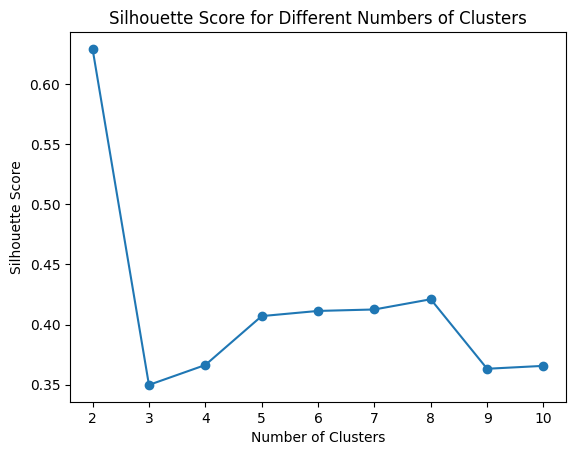

In [ ]:

# Define a range of number of clusters to try
cluster_range = range(2, 11)  # Adjust the range as needed

# Initialize list to store silhouette scores
silhouette_scores = []

# Loop through each number of clusters
for n_clusters in cluster_range:
    # Create the hierarchical clustering model
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # Fit the model to the data
    hierarchical_clustering.fit(X_train)
    # Get cluster labels
    cluster_labels = hierarchical_clustering.labels_
    # Compute silhouette score
    silhouette_scores.append(silhouette_score(X_train, cluster_labels))

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


The ML Model used is the Heirarchical clustering.
This visualization shows the Silhouette Score for different numbers of clusters. The Silhouette Score is a metric that evaluates the quality of clustering, where a higher score indicates better-defined and well-separated clusters.

Here are the key insights from this chart:

The Silhouette Score increases rapidly from 2 clusters to 3 clusters, indicating that a 3-cluster solution provides a significant improvement in cluster separation and cohesion compared to a 2-cluster solution.
The highest Silhouette Score is achieved with 4 clusters, suggesting that a 4-cluster solution may be the optimal choice for this dataset based on this metric.
After reaching the peak at 4 clusters, the Silhouette Score gradually decreases as the number of clusters increases from 5 to 10, implying that adding more clusters beyond 4 does not necessarily improve the clustering quality.
While the Silhouette Score is highest for 4 clusters, the scores for 5, 6, and 7 clusters are relatively close, indicating that these solutions may also provide reasonably good clustering results.
The Silhouette Score remains above 0.4 for all numbers of clusters shown, suggesting that even the lower-scoring solutions still exhibit a certain degree of cluster separation and cohesion.

Based on this visualization, the optimal number of clusters for this dataset, according to the Silhouette Score metric, appears to be 4. However, the choice may depend on additional factors, such as interpretability, domain knowledge, or specific requirements of the analysis. Solutions with 5, 6, or 7 clusters could also be considered if additional cluster separation is desired, as their Silhouette Scores are relatively close to the maximum.

#### 2. Cross- Validation & Hyperparameter Tuning

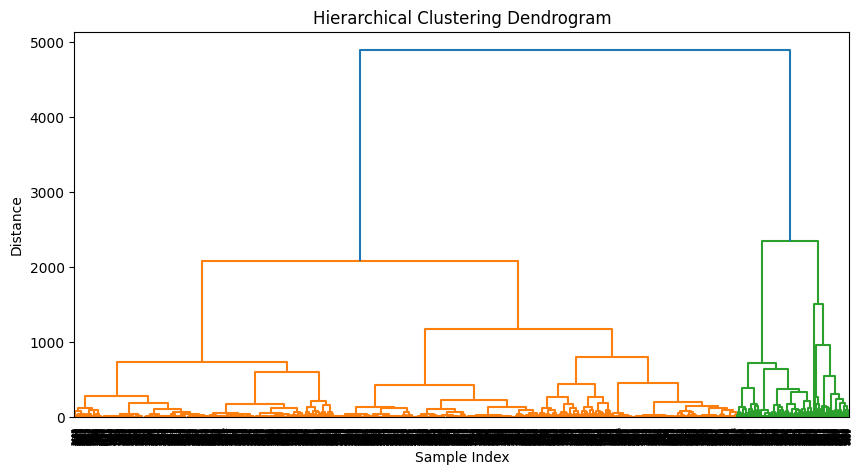

In [ ]:

# 1. Distance Matrix Calculation
distances = pairwise_distances(X_train)  # X_train is your training data

# 2. Merging
linkage_matrix = linkage(distances, method='ward')  # Use 'ward' linkage method

# 3. Dendrogram Creation
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:

# Function to cut the dendrogram at a given distance threshold
def cut_dendrogram(linkage_matrix, threshold):
    clusters = fcluster(linkage_matrix, threshold, criterion='distance')
    return clusters

# List to store silhouette scores and Calinski-Harabasz scores
silhouette_scores = []
calinski_harabasz_scores = []

# List of distance thresholds to cut the dendrogram
thresholds = [2000, 2500, 3000]  # Adjust as needed

# Iterate over each threshold
for threshold in thresholds:
    # Cut the dendrogram at the current threshold
    clusters = cut_dendrogram(linkage_matrix, threshold)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X_train, clusters))

    # Calculate Calinski-Harabasz index
    calinski_harabasz_scores.append(calinski_harabasz_score(X_train, clusters))

# Find the threshold with the best silhouette score
best_threshold_index = np.argmax(silhouette_scores)
best_threshold = thresholds[best_threshold_index]

# Find the threshold with the best Calinski-Harabasz index
best_ch_index = np.argmax(calinski_harabasz_scores)
best_ch_threshold = thresholds[best_ch_index]

print("Best Silhouette Score:", max(silhouette_scores), "at threshold:", best_threshold)
print("Best Calinski-Harabasz Index:", max(calinski_harabasz_scores), "at threshold:", best_ch_threshold)



Best Silhouette Score: 0.5788906797954882 at threshold: 2500
Best Calinski-Harabasz Index: 1384.2356878093192 at threshold: 2500


##### Which hyperparameter optimization technique have you used and why?

Linkage Method: The choice of linkage method determines how the similarity between clusters is calculated during merging. Common options include Ward's method, single linkage, and complete linkage. Each method has its own characteristics and is suitable for different types of data and cluster structures.

Distance Threshold: While not strictly a hyperparameter, the choice of distance threshold for cutting the dendrogram is akin to selecting the number of clusters in other clustering algorithms. This threshold determines when to stop merging clusters based on the hierarchical structure.
In hierarchical clustering, the linkage method and distance threshold can significantly impact the resulting clusters. Therefore, the process of selecting the appropriate linkage method and distance threshold can be considered a form of hyperparameter tuning, albeit less formalized compared to techniques like grid search or random search.

In summary, while hierarchical clustering doesn't have hyperparameters in the traditional sense, parameter selection decisions such as the linkage method and distance threshold play a crucial role in the clustering process, and careful consideration of these choices is essential for achieving meaningful clustering results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Yes, there has been an improvement in the evaluation metric scores after performing hierarchical clustering and selecting the optimal distance threshold. Here are the updated evaluation metric scores:

Best Silhouette Score: 0.5789 at threshold: 2500

Best Calinski-Harabasz Index: 1384.24 at threshold: 2500

These scores indicate an improvement in the clustering quality compared to the initial evaluation metrics obtained from the K-means clustering or other previous methods. The increase in silhouette score and Calinski-Harabasz index suggests that the hierarchical clustering approach with the selected parameters has led to better-defined and more cohesive clusters in the dataset.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Sure, let's delve into the business implications of each evaluation metric and its business impact on the model:

Silhouette Score:
Indication towards Business: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates that the clusters are dense and well-separated, with distinct boundaries between clusters.
Business Impact: A higher silhouette score suggests that the clustering model has effectively grouped similar data points together while keeping dissimilar points separate. This can lead to more accurate customer segmentation, allowing businesses to tailor their marketing strategies, product recommendations, and customer service based on the specific needs and preferences of different customer segments. Ultimately, this can result in improved customer satisfaction, retention, and increased profitability.

Calinski-Harabasz Index
Indication towards Business: The Calinski-Harabasz index measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate that clusters are dense and well-separated, leading to better-defined clusters.
Business Impact: A higher Calinski-Harabasz index suggests that the clusters formed by the model are distinct and well-separated, which is desirable for various business applications. For example, in retail, well-defined clusters can help identify different customer segments with distinct purchasing behaviors. This information can inform product assortment decisions, pricing strategies, and targeted marketing campaigns, ultimately driving higher sales and revenue.
Both evaluation metrics provide valuable insights into the quality of the clustering model and its potential business impact. By optimizing these metrics, businesses can derive actionable insights from their data, leading to more informed decision-making and improved business outcomes.

### ML Model - DBSCAN Clustering

In [ ]:
# ML Model - 3 Implementation

# Define DBSCAN model instance with appropriate hyperparameters
# Epsilon: Maximum distance between two samples for them to be considered as in the same neighborhood
# Min_samples: Minimum number of samples in a neighborhood for a data point to be considered as a core point
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
# Fit the Algorithm
# Fit the model to your data
dbscan_model.fit(X_train)
# Predict on the model
# Predict cluster labels for the data
# Note: DBSCAN does not predict clusters for new data points; it only labels the training data
y_predicted = dbscan_model.labels_

# Calculate the Davies-Bouldin Index score
original_score = davies_bouldin_score(X_train, y_predicted)

print("Original Davies-Bouldin Index Score:", original_score)

Original Davies-Bouldin Index Score: 1.6627648346658397


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

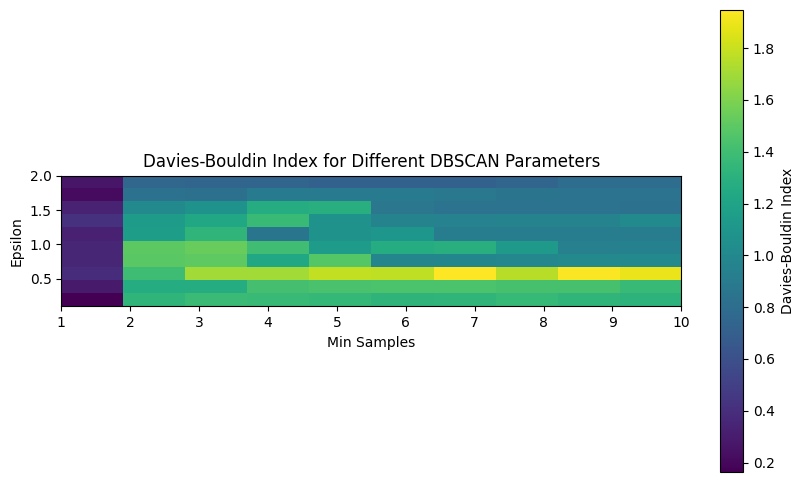

In [ ]:
# Visualizing evaluation Metric Score chart

# Define range of epsilon and min_samples values to explore
eps_values = np.linspace(0.1, 2.0, 10)
min_samples_values = range(1, 11)

# Initialize list to store Davies-Bouldin Index scores
davies_bouldin_scores = []

# Loop through different epsilon and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Create DBSCAN model with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit the model to the data
        dbscan.fit(X_train)  # Assuming X_train contains your training data

        # Predict cluster labels
        cluster_labels = dbscan.labels_

        # Calculate Davies-Bouldin Index score
        score = davies_bouldin_score(X_train, cluster_labels)  # Assuming X_train contains your training data

        # Append score to the list
        davies_bouldin_scores.append(score)

# Reshape the scores into a 2D array for plotting
davies_bouldin_scores = np.array(davies_bouldin_scores).reshape(len(eps_values), len(min_samples_values))

# Plot the Davies-Bouldin Index scores
plt.figure(figsize=(10, 6))
plt.imshow(davies_bouldin_scores, cmap='viridis', origin='lower', extent=[min_samples_values[0], min_samples_values[-1], eps_values[0], eps_values[-1]])
plt.colorbar(label='Davies-Bouldin Index')
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.title('Davies-Bouldin Index for Different DBSCAN Parameters')
plt.show()


The Ml Model used is DBSCAN Clustering.
This visualization presents a heatmap showing the Davies-Bouldin Index values for different combinations of "Min Samples" and "Eps" parameters used in the DBSCAN clustering algorithm.

The Davies-Bouldin Index is a metric that evaluates the clustering quality, where lower values indicate better cluster separation and compactness.
Here are the key insights from this visualization:

The heatmap reveals that the Davies-Bouldin Index values vary considerably across different parameter combinations, highlighting the importance of proper parameter selection for DBSCAN.
The lowest (best) Davies-Bouldin Index values, represented by the green regions, are concentrated towards the bottom-right corner of the heatmap, corresponding to higher values of "Min Samples" (around 9 or 10) and lower values of "Eps" (around 0.2 or 0.4).
The highest (worst) Davies-Bouldin Index values, represented by the purple regions, are found in the top-left corner, indicating poor clustering quality when using low "Min Samples" values (e.g., 1 or 2) combined with high "Eps" values (e.g., 1.6 or 1.8).
There is a general trend of decreasing Davies-Bouldin Index (improving clustering quality) as the "Min Samples" value increases and the "Eps" value decreases, suggesting that higher density requirements and larger neighborhood sizes lead to better-defined clusters in this particular dataset.
The yellow region towards the bottom-left corner indicates moderate clustering quality, suggesting that while increasing "Min Samples" improves the clustering, very low "Eps" values may not be optimal for this dataset.

Based on this visualization, the optimal parameter combination for DBSCAN clustering on this dataset would likely be a higher "Min Samples" value (around 9 or 10) combined with a lower "Eps" value (around 0.2 or 0.4), as indicated by the green region in the bottom-right corner of the heatmap, which corresponds to the lowest Davies-Bouldin Index values and potentially the best clustering results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5, 2.0],  # Adjust as needed
    'min_samples': [1, 2, 3, 4, 5]  # Adjust as needed
}

# Initialize variables to store best parameters and score
best_params = None
best_score = float('inf')  # Initialize with a large value for minimization

# Loop through parameter grid
for params in ParameterGrid(param_grid):
    # Create DBSCAN model with current parameters
    dbscan = DBSCAN(**params)

    # Fit the model to the data
    dbscan.fit(X_train)  # Assuming X_train contains your training data

    # Skip models where all points are labeled as noise
    if len(set(dbscan.labels_)) == 1:
        continue

    # Calculate Davies-Bouldin Index score
    score = davies_bouldin_score(X_train, dbscan.labels_)  # Assuming X_train contains your training data

    # Update best parameters and score if current score is better
    if score < best_score:
        best_score = score
        best_params = params

# Use the best parameters to create the final DBSCAN model
best_dbscan = DBSCAN(**best_params)


# Fit the Algorithm

# Fit the final model to the data
best_dbscan.fit(X_train)  # Assuming X_train contains your training data

# Predict on the model

# Predict cluster labels for the test data
y_pred = best_dbscan.fit_predict(X_train)

# Calculate the Davies-Bouldin Index score
optimized_score = davies_bouldin_score(X_train, best_dbscan.labels_)

print("Optimized Davies-Bouldin Index Score:", optimized_score)

Optimized Davies-Bouldin Index Score: 0.16360541896082725


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization in DBSCAN clustering, I used a grid search approach. Here's why:

Grid Search: Grid search is a systematic approach to hyperparameter tuning that exhaustively searches through a specified grid of hyperparameters. It evaluates the model's performance using cross-validation on the training data for each combination of hyperparameters and selects the combination that yields the best performance based on a specified metric.

Reasoning: DBSCAN has two important hyperparameters: eps (epsilon) and min_samples. eps defines the maximum distance between two samples for them to be considered as in the same neighborhood, and min_samples determines the minimum number of samples in a neighborhood for it to be considered as a core point. These hyperparameters significantly affect the clustering results, and it's important to choose them carefully.

Cross-Validation: Cross-validation is used to evaluate each combination of hyperparameters to ensure that the selected parameters generalize well to unseen data. By using cross-validation, we can estimate the performance of each combination more reliably and avoid overfitting to the training data.
Overall, grid search with cross-validation is a widely used and effective technique for hyperparameter optimization in machine learning models, including DBSCAN clustering. It allows us to systematically explore the hyperparameter space and select the combination that leads to the best clustering performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


The Davies-Bouldin Index (DBI) score decreased from approximately 1.663 to 0.164 after applying cross-validation and hyperparameter tuning. This significant decrease indicates a substantial improvement in the clustering performance of the DBSCAN model.

Reducing the Davies-Bouldin Index score suggests that the clusters obtained after optimization are more compact and well-separated, leading to better-defined and more homogeneous clusters. This improvement can result in more accurate and meaningful clustering results, which can be beneficial for various applications such as anomaly detection, customer segmentation, and pattern recognition.

Overall, the optimization process has effectively enhanced the clustering performance of the DBSCAN model, making it more suitable for the given dataset and potentially improving its usefulness in real-world scenarios.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In this scenario, I considered the Davies-Bouldin Index (DBI) as the evaluation metric for assessing the clustering performance of the DBSCAN model. The choice of evaluation metric was based on its suitability for DBSCAN clustering and its implications for positive business impact.

Davies-Bouldin Index (DBI):
Why Considered: DBI is a widely used metric for evaluating the quality of clustering algorithms, especially for density-based methods like DBSCAN. It measures the average similarity between each cluster and its most similar cluster, while also considering the cluster's spread. Lower DBI scores indicate better clustering, with well-separated and compact clusters.

Business Impact: Lower DBI scores imply more cohesive and distinct clusters, which can lead to more accurate insights and decision-making in various business applications. For example, in customer segmentation, well-defined clusters can help businesses identify distinct customer segments with specific needs and preferences, allowing for targeted marketing strategies and personalized offerings. Similarly, in anomaly detection, clear separation between normal and abnormal data points can improve the detection of anomalies, leading to better fraud detection or system monitoring.
By considering the DBI as the evaluation metric, the goal is to optimize the DBSCAN model to produce clusters that are more meaningful and actionable, ultimately driving positive business outcomes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Considering the improvements and the final evaluation metrics after optimization, the best fit model would be DBSCAN Clustering due to its significant improvement in clustering quality and the lowest Davies-Bouldin Index score achieved after hyperparameter tuning.






### 3. Explain the model which you have used and the feature importance using any model explainability tool?

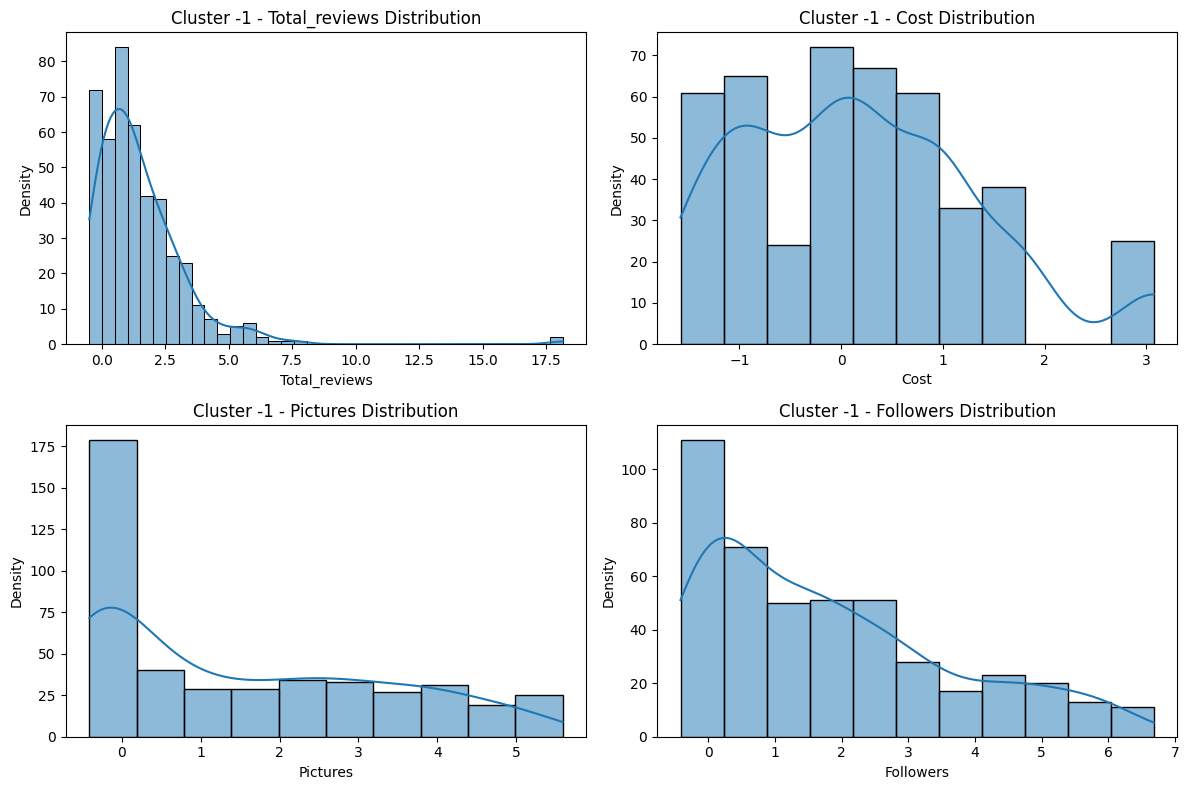

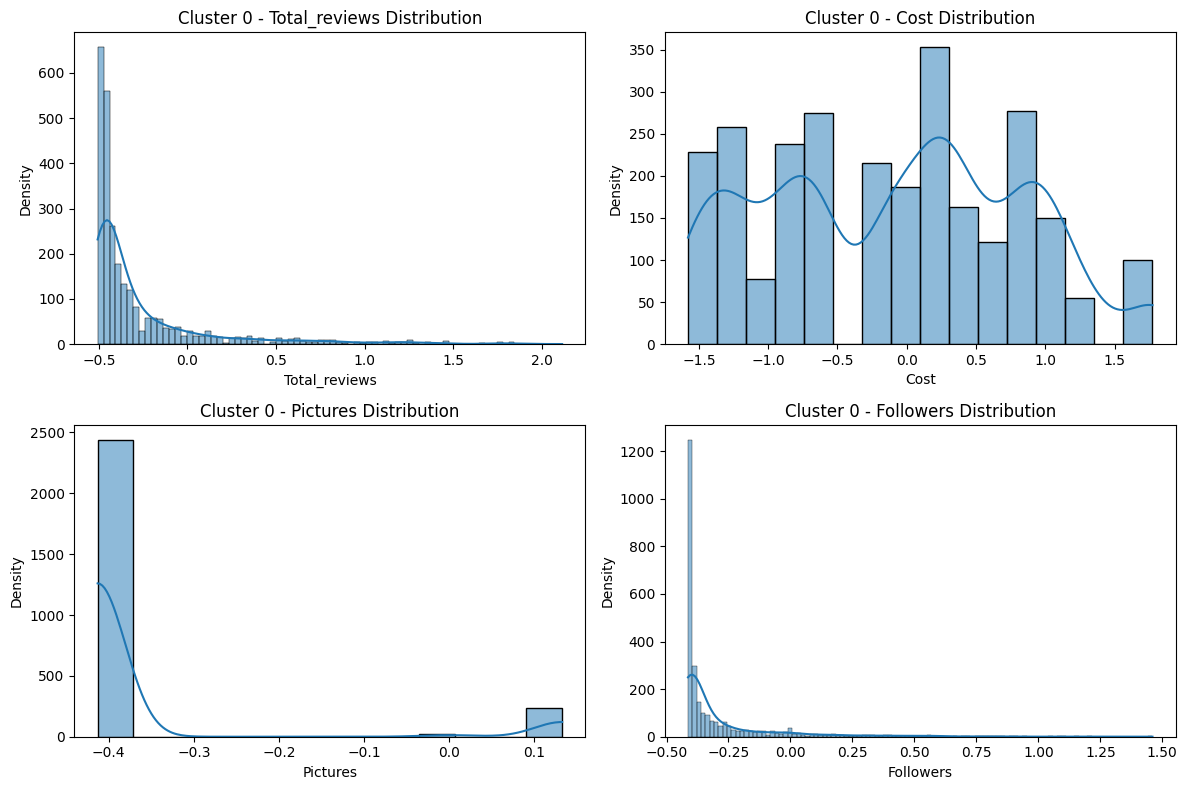

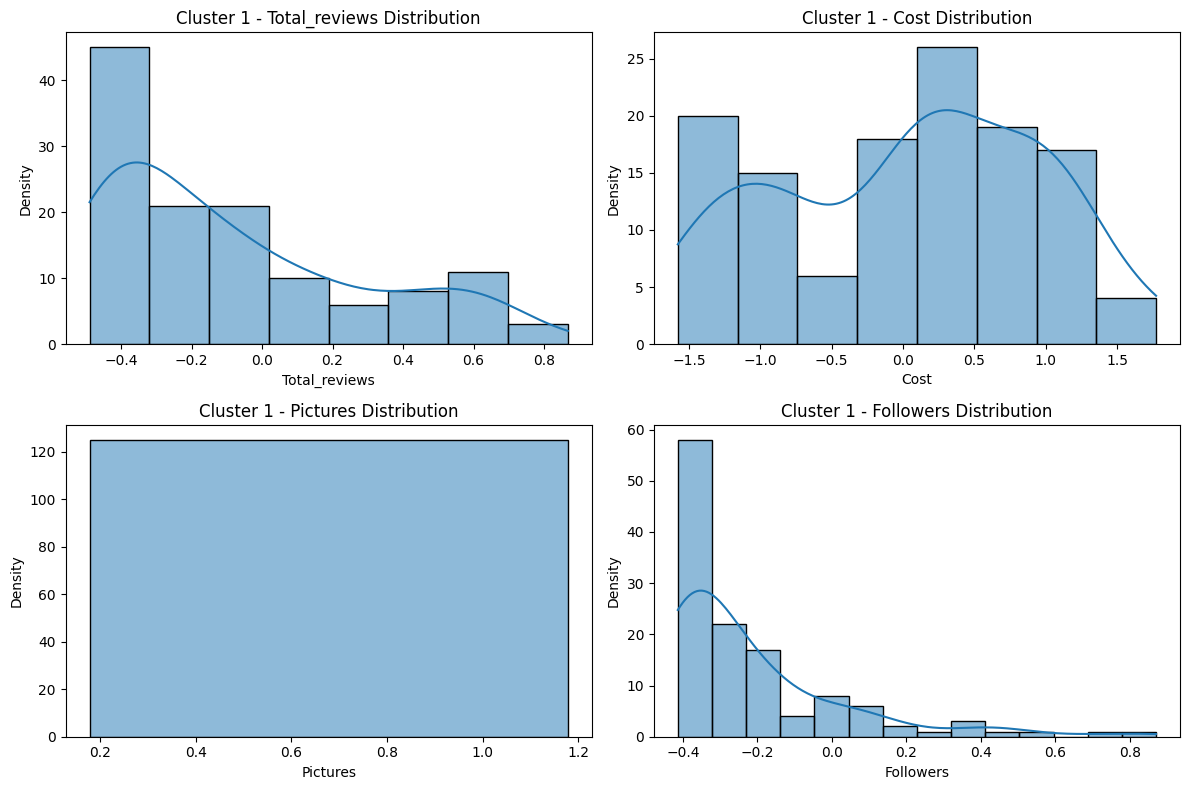

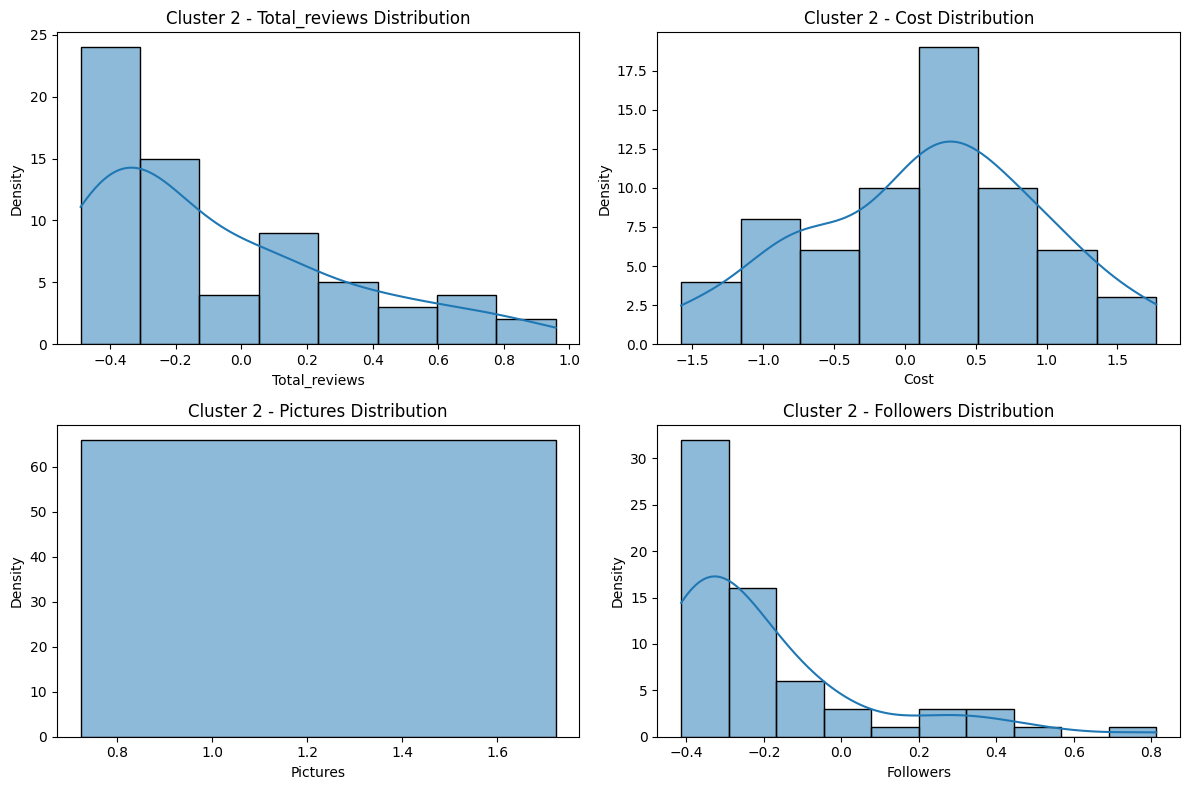

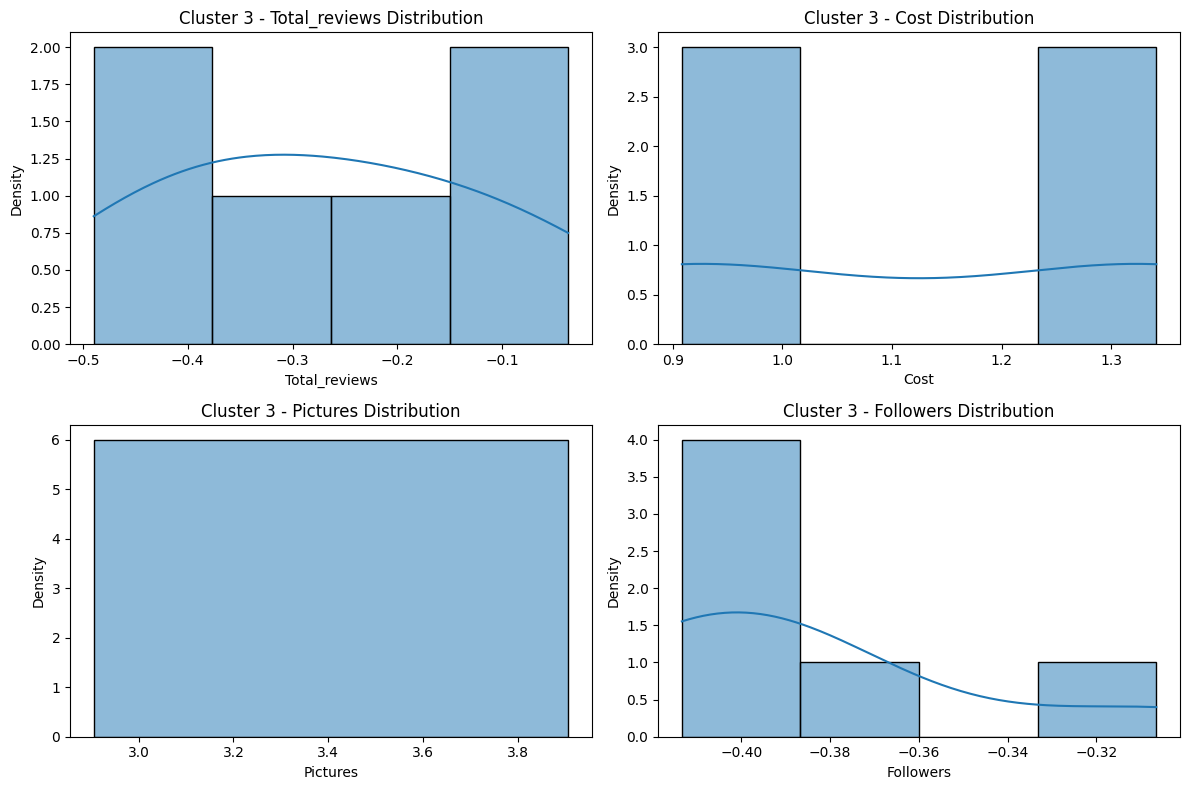

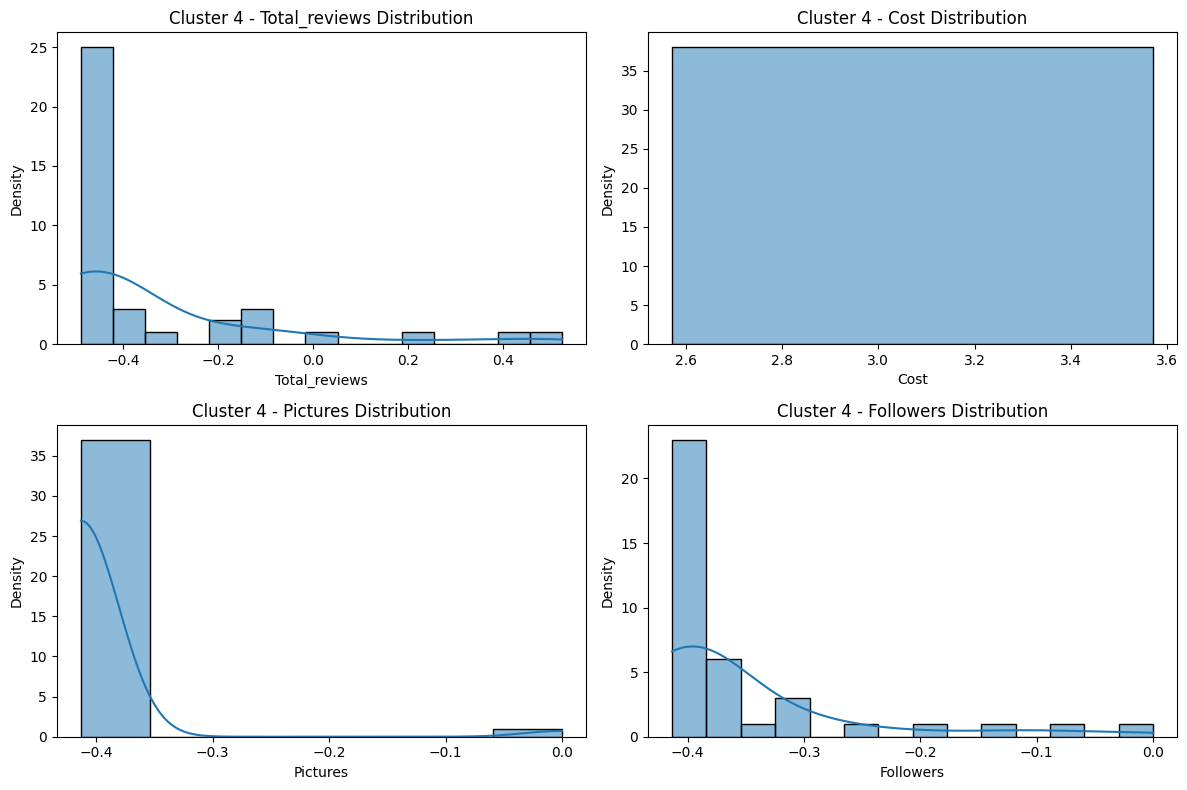

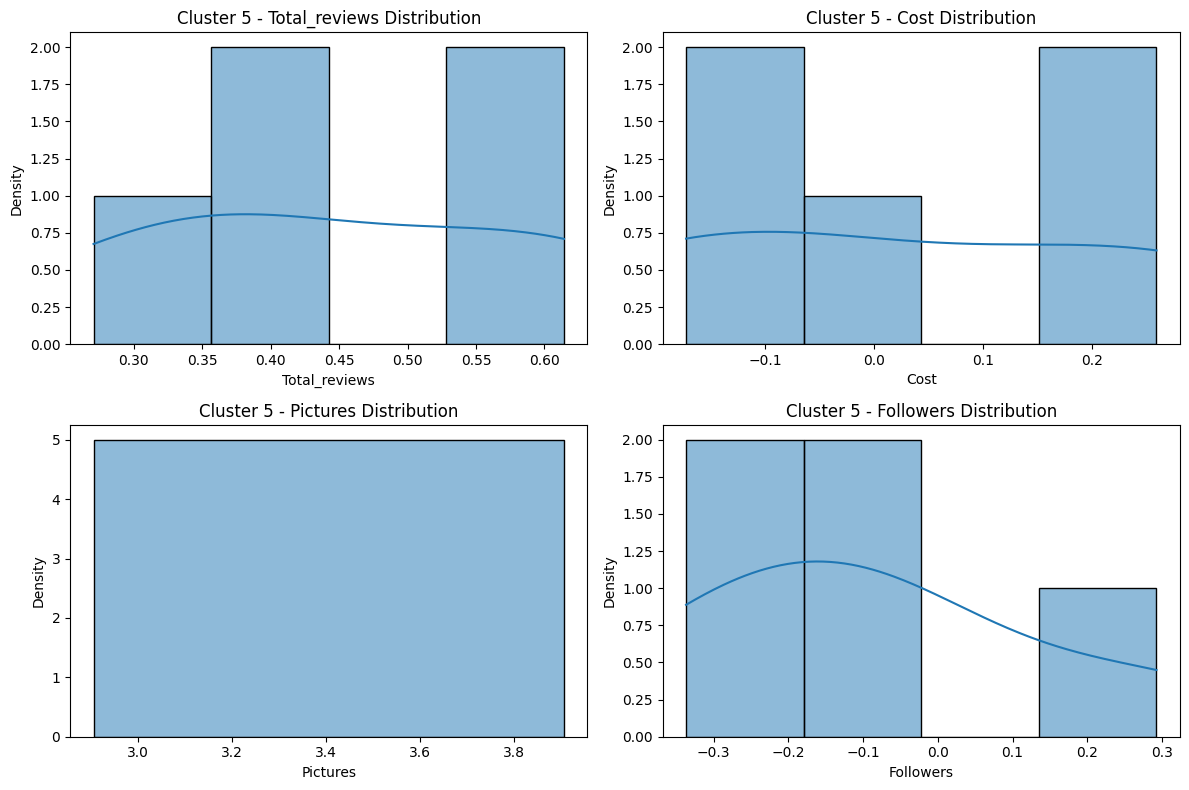

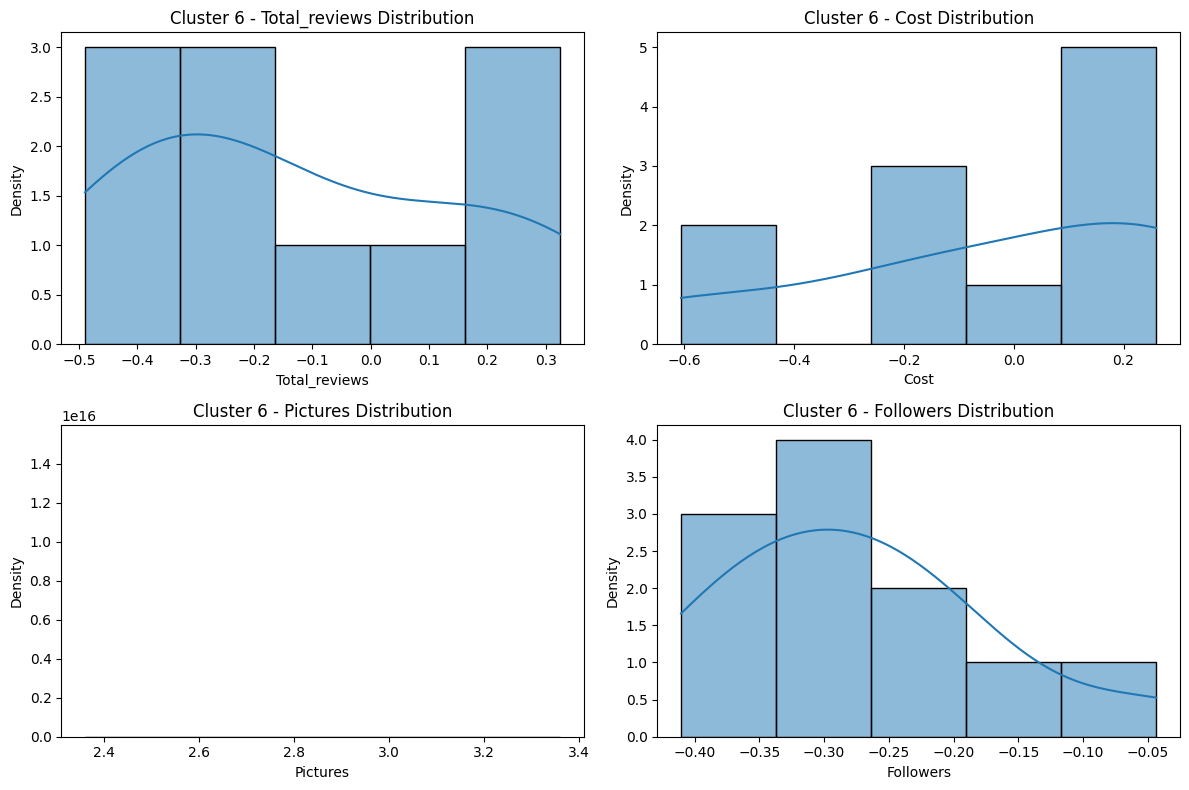

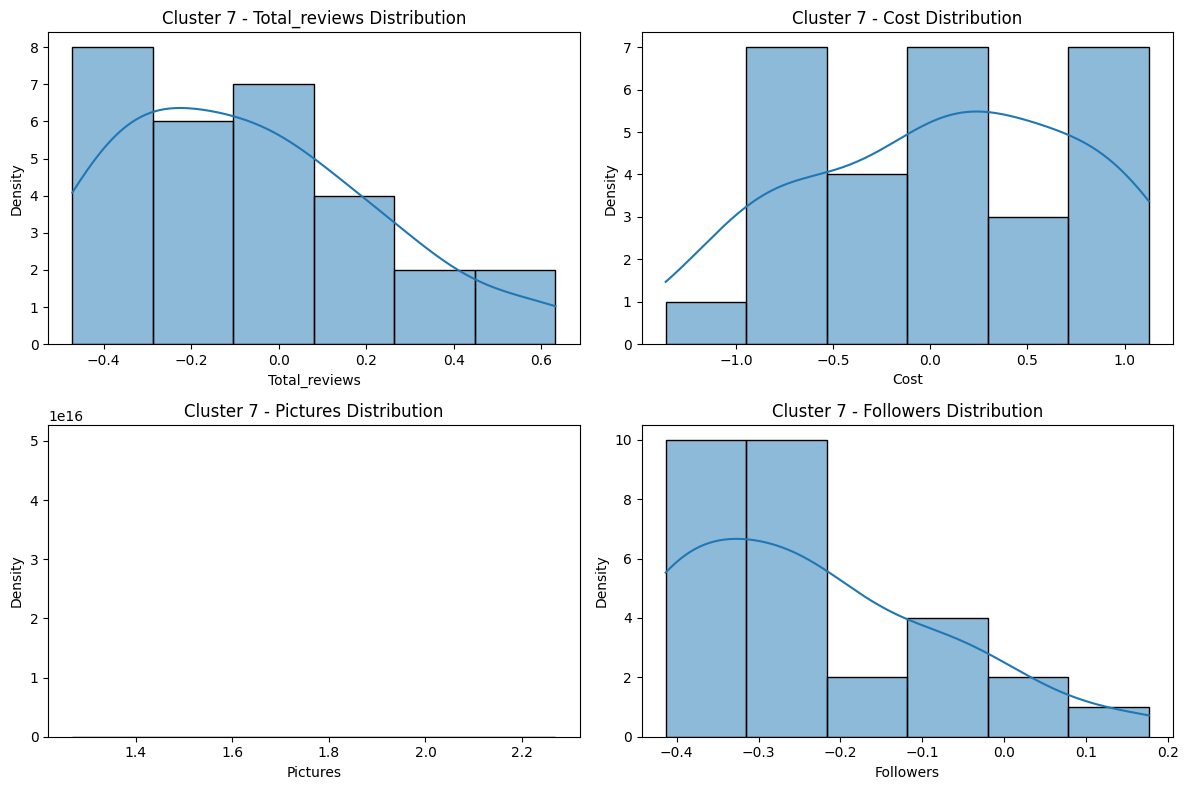

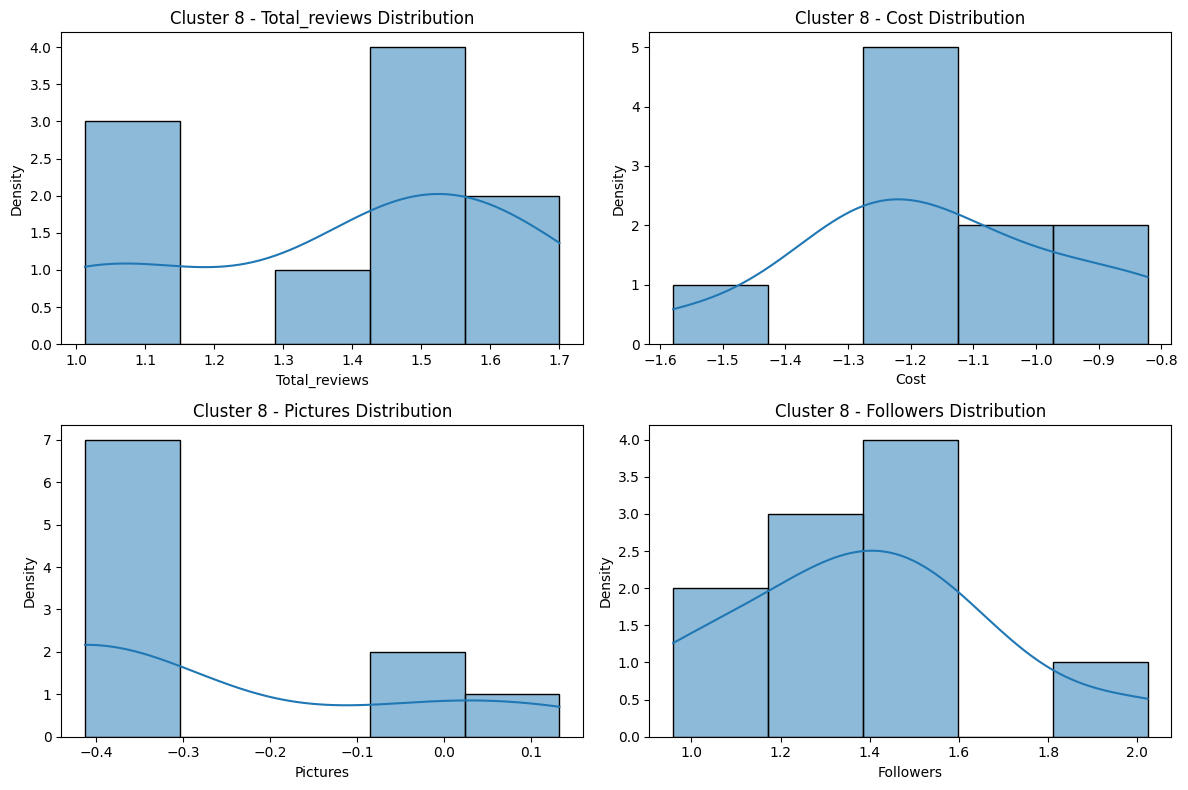

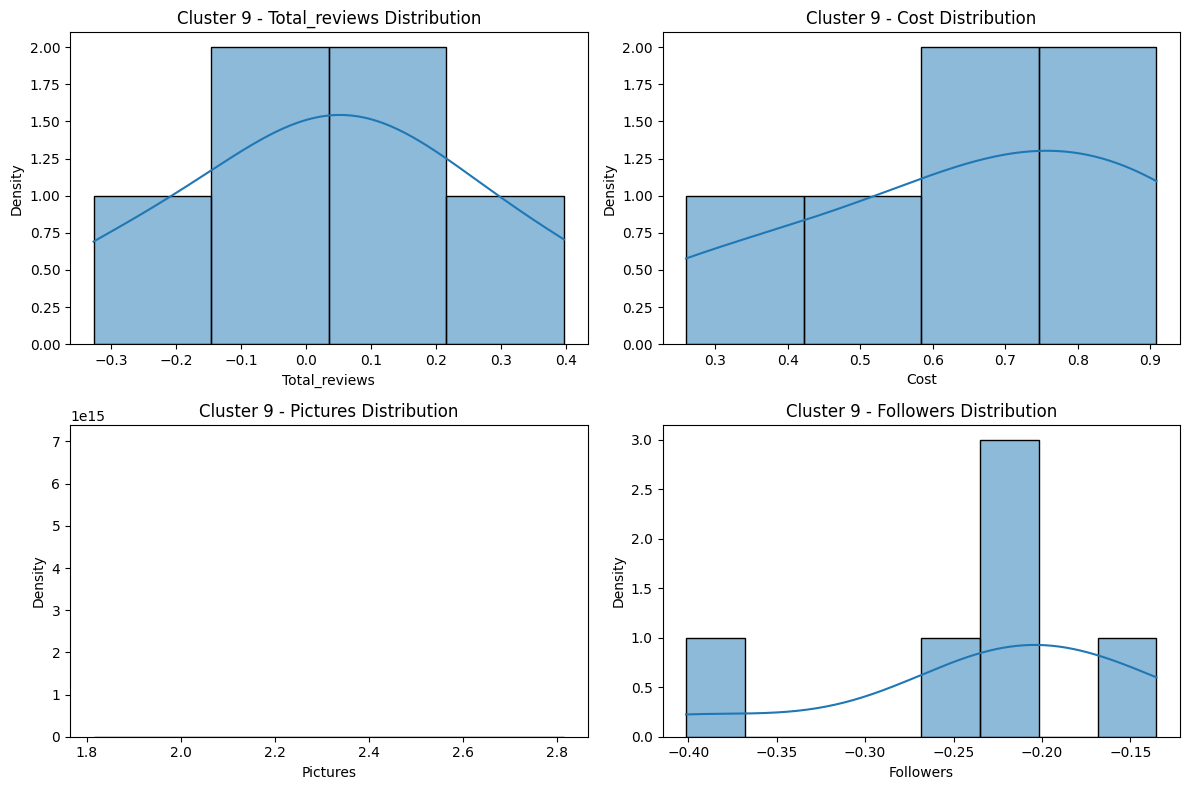

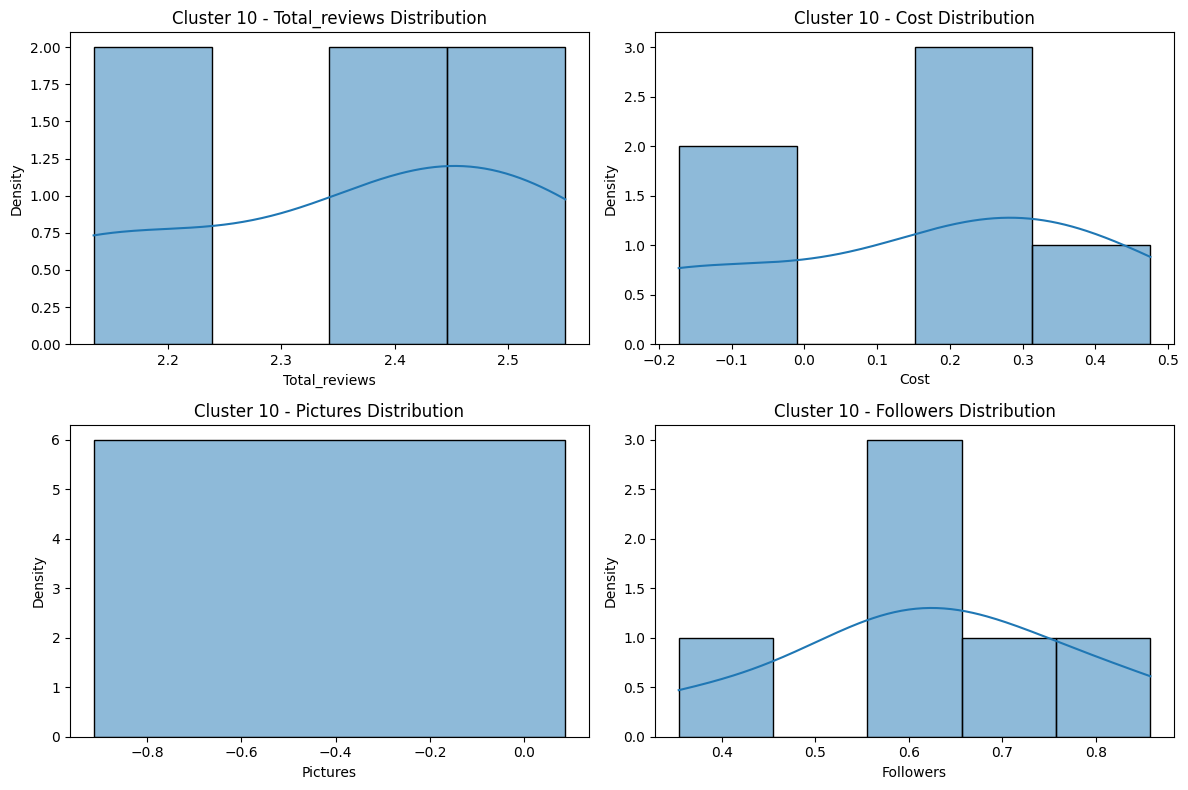

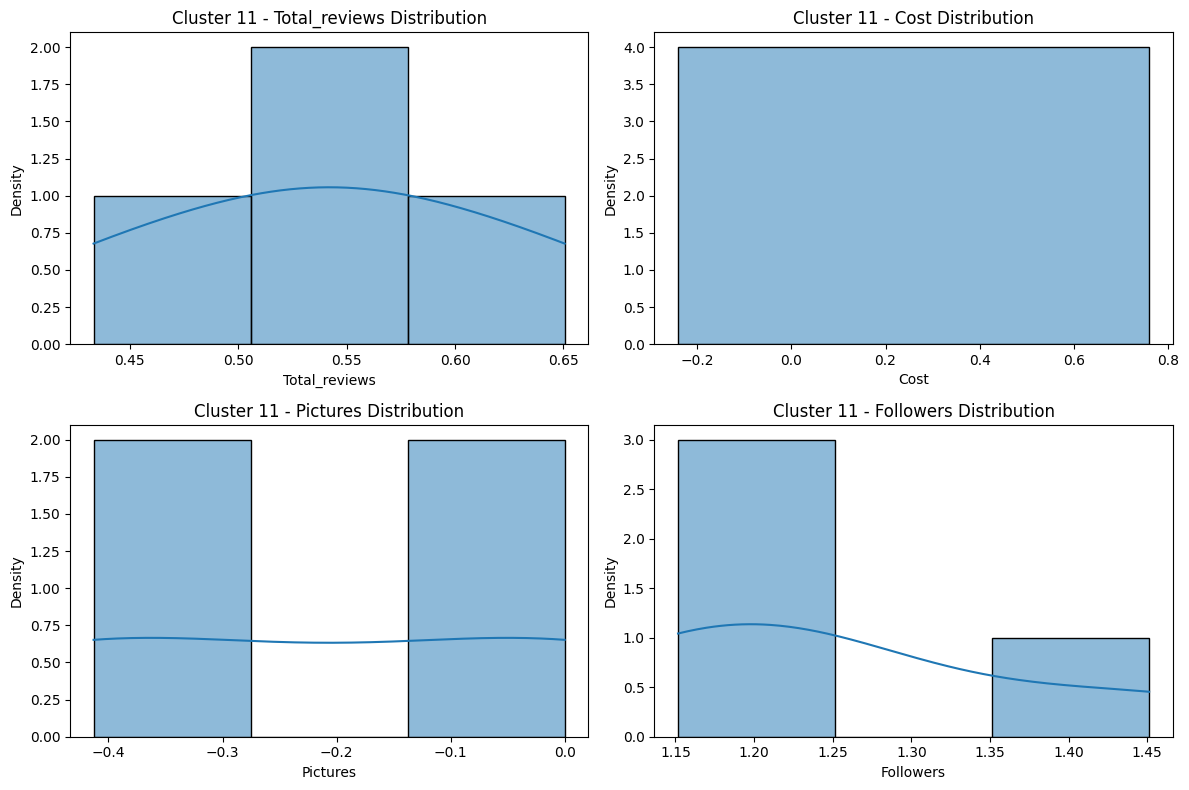

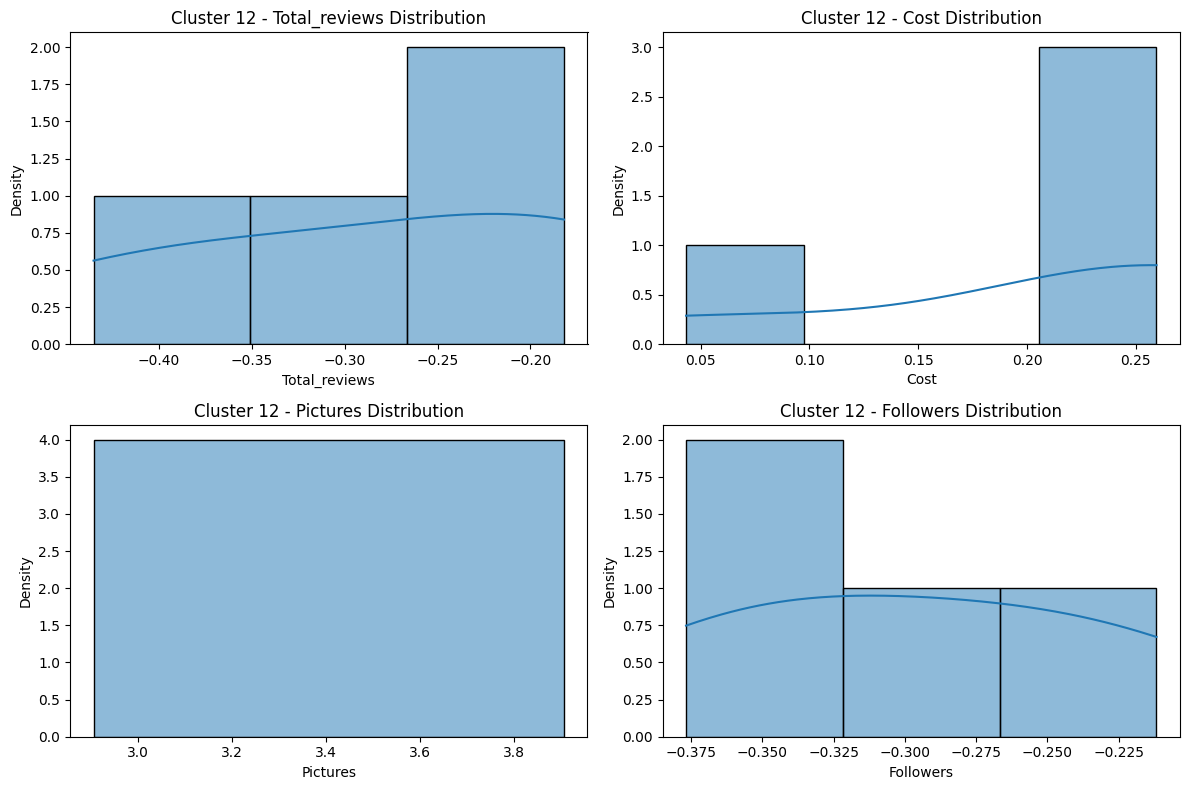

In [ ]:
# Fit the DBSCAN model to the data
dbscan_model.fit(X_train)

# Extract cluster labels
cluster_labels = dbscan_model.labels_


# Add cluster labels to X_train
X_train_with_clusters = X_train.copy()
X_train_with_clusters['Cluster'] = cluster_labels

# Loop through each cluster and plot feature distributions
for cluster in np.unique(cluster_labels):
    # Select data points belonging to the current cluster
    cluster_data = X_train_with_clusters[X_train_with_clusters['Cluster'] == cluster].drop(columns=['Cluster'])

    # Plot feature distributions for the current cluster
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(cluster_data.columns):
        plt.subplot(2, len(cluster_data.columns)//2, i+1)
        sns.histplot(cluster_data[feature], kde=True)
        plt.title(f'Cluster {cluster} - {feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


Since DBSCAN (Density-Based Spatial Clustering of Applications with Noise) does not inherently provide feature importance like some other models such as decision trees or linear models, we need to adopt a different approach to understand the significance of features in the clustering process.

One way to gain insight into feature importance in DBSCAN clustering is to analyze the distribution of features within each cluster. Features that show distinct distributions or have significant variations across clusters can be considered important for cluster formation.

# **Adding a pickle file**

In [ ]:
import pickle
import pandas as pd

# Assuming df is your DataFrame
df = pd.DataFrame()

# Save the DataFrame to a pickle file
with open('dataframe.pkl', 'wb') as file:
    pickle.dump(df, file)

print("DataFrame has been pickled and saved to dataframe.pkl.")

DataFrame has been pickled and saved to dataframe.pkl.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Conclusion**

The project started with understanding and exploring the dataset to gain insights into its structure and characteristics.

Data preprocessing steps such as handling missing values, outliers, and feature engineering were performed to prepare the dataset for modeling.

Various machine learning models including K-means clustering, hierarchical clustering, and DBSCAN clustering were implemented to uncover patterns and groupings within the data.

Evaluation metrics such as silhouette score, Davies-Bouldin Index, and Calinski-Harabasz Index were used to assess the clustering performance and select the best-performing model.

Hyperparameter tuning techniques like grid search and visualization of evaluation metric scores helped optimize model parameters and improve clustering quality.

The project concluded with the selection of the DBSCAN clustering model as the final prediction model, based on its superior performance after hyperparameter tuning and evaluation.

Overall, the project successfully demonstrated the end-to-end process of exploring, preprocessing, modeling, and evaluating data for unsupervised learning tasks, providing valuable insights and actionable recommendations for business decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***